# Disentangling the relationships between discounts, sales, and profits for a global retailer #

## In this notebook: ##

__-Cleaning: check for missing data and duplicates, change data types,__<br>
__-Creating time series features from order dates__<br>

__-Aggregated sales, profit, and units sold by the 7 markets the retailer services to find the most profitable region__<br>
__-Aggregated sales, profit, and units sold by the product category to find the most profitable product category__<br>

__-Time series analysis of sales, profit, and number of discounts per month from 2011-2014. The year 2014 had the highest sales and the highest number of discounts. However, profit remained relatively stagnant despite the increased sales__<br>

__-Pie charts to show the percentage of profitable vs non profitable orders for total orders, discounted orders, and orders with a profit/sales > 30%__<br>

__-Barcharts of: the distribution of discounts by percentage as well as sales and profit by percentage__<br>

__-Correlation of numerical features with profit__<br>

__-Linear regression using Seaborn's regplot to predict profit as a function of sales by discount percentage__<br>
__-Linear regression of sales vs profit for grouped discount percentages from low (7-20%), medium (25-50%), and high (55-85%)__<br>
__-Linear regression of shipping cost vs sales and shipping cost vs profit__<br>
__-Linear regression of sales vs profit for 7, 10, 15, 20, 25% with marker size as shipping cost__<br>

__-Kernel density estimates of profit, sales, and shipping cost based on discount percentage bracket and units purchased per order__<br>
__-Probability calculations for given metrics, discount percentage, and dollar amount spent__

__-log10 transformation of sales distribution to make them approximately normal for a t-test__<br>
__-1 sample t-test at the 95% confidence level of mean sales and mean profit vs the mean of total discounts, 7-20% discounts, and 2014 sales and profits__<br>

https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statistics as sts
from sklearn.metrics import r2_score
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (12,5)
plt.style.use('ggplot')
scatter_kw = {'s':50, 'linewidth': 0.5, 'edgecolor':'w'}

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv("Global_Superstore2.csv",
                encoding='latin1')
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [3]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [4]:
df['Country'].nunique()

147

# Cleaning the data #

looking for missing data - how will we handle NaNs? 

locating duplicates



## Missing data ##

In [5]:
#how much data is missing per column?
for col in df.columns:
    percent_missing=100*np.mean(df[col].isnull())
    print('{}-{}%'.format(col, percent_missing))

Row ID-0.0%
Order ID-0.0%
Order Date-0.0%
Ship Date-0.0%
Ship Mode-0.0%
Customer ID-0.0%
Customer Name-0.0%
Segment-0.0%
City-0.0%
State-0.0%
Country-0.0%
Postal Code-80.51472021836615%
Market-0.0%
Region-0.0%
Product ID-0.0%
Category-0.0%
Sub-Category-0.0%
Product Name-0.0%
Sales-0.0%
Quantity-0.0%
Discount-0.0%
Profit-0.0%
Shipping Cost-0.0%
Order Priority-0.0%


The only missing data is in the postal code column - missing data will be ignored for now

## Duplicates ##

In [6]:
#no duplicates found
df.drop_duplicates()
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State  ...        Product ID         Category Sub-Category  \
0             New York  ...   TEC-AC-10003033       Technology  Accessories   
1      New South Wales  ...   FUR-CH-10003950        Furniture       Chairs   
2           Queensland  ...   TEC-PH-10004664       Technology       Phones   
3               Berlin  ...   TEC-PH-10004583       Technology       Phones   
4                Dakar  ...  TEC-SHA-10000501       Technology      Copiers   
...                ...  ...               ...              ...          ...   
51285        Hiroshima  ...   OFF-FA-10000746  Office Supplies    Fasteners   
51286            Texas  ...   OFF-AP-10002906  Office Supplies   Appliances   
51287       California  ...   OFF-EN-10001219  Office Supplies    Envelopes   
51288        São Paulo  ...   OFF-BI-10000806  Office Supplies      Binders   
51289          Managua  ...   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650        7   
1              Novimex Executive Leather Armchair, Black  3709.395        9   
2                      Nokia Smart Phone, with Caller ID  5175.171        9   
3                         Motorola Smart Phone, Cordless  2892.510        5   
4                         Sharp Wireless Fax, High-Speed  2832.960        8   
...                                                  ...       ...      ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100        5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444        1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920        3   
51288                            Acco Index Tab, Economy    13.440        2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380        3   

      Discount    Profit  Shipping Cost  Order Priority  
0          0.0  762.1845         933.57        Critical  
1          0.1 -288.7650         923.63        Critical  
2          0.1  919.9710         915.49          Medium  
3          0.1  -96.5400         910.16          Medium  
4          0.0  311.5200         903.04        Critical  
...        ...       ...            ...             ...  
51285    

In [7]:
#display all of the columns
pd.set_option('display.max_columns', None)
df.head()

Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  \
0       Rick Hansen     Consumer  New York City         New York   
1     Justin Ritter    Corporate     Wollongong  New South Wales   
2      Craig Reiter     Consumer       Brisbane       Queensland   
3  Katherine Murray  Home Office         Berlin           Berlin   
4       Rick Hansen     Consumer          Dakar            Dakar   

         Country  Postal Code  Market   Region        Product ID    Category  \
0  United States      10024.0      US     East   TEC-AC-10003033  Technology   
1      Australia          NaN    APAC  Oceania   FUR-CH-10003950   Furniture   
2      Australia          NaN    APAC  Oceania   TEC-PH-10004664  Technology   
3        Germany          NaN      EU  Central   TEC-PH-10004583  Technology   
4        Senegal          NaN  Africa   Africa  TEC-SHA-10000501  Technology   

  Sub-Category                                       Product Name     Sales  \
0  Accessories  Plantronics CS510 - Over-the-Head monaural Wir...  2309.650   
1       Chairs          Novimex Executive Leather Armchair, Black  3709.395   
2       Phones                  Nokia Smart Phone, with Caller ID  5175.171   
3       Phones                     Motorola Smart Phone, Cordless  2892.510   
4      Copiers                     Sharp Wireless Fax, High-Speed  2832.960   

   Quantity  Discount    Profit  Shipping Cost Order Priority  
0         7       0.0  762.1845         933.57       Critical  
1         9       0.1 -288.7650         923.63       Critical  
2         9       0.1  919.9710         915.49         Medium  
3         5       0.1  -96.5400         910.16         Medium  
4         8       0.0  311.5200         903.04       Critical

In [8]:
print('Total records: 51290')
print('Number of unique orders: ', len(pd.unique(df['Order ID'])))
print('Number of unique customers: ', len(pd.unique(df['Customer ID'])))
print('Countries serviced: ', len(pd.unique(df['Country'])))

Total records: 51290
Number of unique orders:  25035
Number of unique customers:  1590
Countries serviced:  147


## Changing data types ##

In [9]:
#change the discount column from float to int to make it easier to work with later
df['Discount'] = df['Discount']*100
df['Discount']= df['Discount'].astype('int64')
df['Discount']

0         0
1        10
2        10
3        10
4         0
         ..
51285     0
51286    80
51287     0
51288     0
51289     0
Name: Discount, Length: 51290, dtype: int64

what categories are the most popular?

what subcategory of each category is most popular?

when is ordering most common?

what is the most popular product?

what country sees the most shipment and gross?

what state sees the most shipments?

what states have the highest gross?

__is the freq of ordering higher when the customer has a discount?__

__does higher order priority correlate with the order price?__

__does a higher discount amount lead to increased profit?__

In [10]:
df

Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
1        JR-16210     Justin Ritter    Corporate     Wollongong   
2        CR-12730      Craig Reiter     Consumer       Brisbane   
3        KM-16375  Katherine Murray  Home Office         Berlin   
4         RH-9495       Rick Hansen     Consumer          Dakar   
...           ...               ...          ...            ...   
51285    KE-16420   Katrina Edelman    Corporate           Kure   
51286    ZC-21910  Zuschuss Carroll     Consumer        Houston   
51287    LB-16795    Laurel Beltran  Home Office         Oxnard   
51288    RB-19795        Ross Baird  Home Office       Valinhos   
51289    MC-18100     Mick Crebagga     Consumer       Tipitapa   

                 State        Country  Postal Code  Market      Region  \
0             New York  United States      10024.0      US        East   
1      New South Wales      Australia          NaN    APAC     Oceania   
2           Queensland      Australia          NaN    APAC     Oceania   
3               Berlin        Germany          NaN      EU     Central   
4                Dakar        Senegal          NaN  Africa      Africa   
...                ...            ...          ...     ...         ...   
51285        Hiroshima          Japan          NaN    APAC  North Asia   
51286            Texas  United States      77095.0      US     Central   
51287       California  United States      93030.0      US        West   
51288        São Paulo         Brazil          NaN   LATAM       South   
51289          Managua      Nicaragua          NaN   LATAM     Central   

             Product ID         Category Sub-Category  \
0       TEC-AC-10003033       Technology  Accessories   
1       FUR-CH-10003950        Furniture       Chairs   
2       TEC-PH-10004664       Technology       Phones   
3       TEC-PH-10004583       Technology       Phones   
4      TEC-SHA-10000501       Technology      Copiers   
...                 ...              ...          ...   
51285   OFF-FA-10000746  Office Supplies    Fasteners   
51286   OFF-AP-10002906  Office Supplies   Appliances   
51287   OFF-EN-10001219  Office Supplies    Envelopes   
51288   OFF-BI-10000806  Office Supplies      Binders   
51289   OFF-PA-10004155  Office Supplies        Paper   

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 

# Summary statistics #

In [11]:
#quick overview of categorical data
df.describe(include='object')

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
count            51290       51290       51290           51290       51290   
unique           25035        1430        1464               4        1590   
top     CA-2014-100111  18-06-2014  22-11-2014  Standard Class    PO-18850   
freq                14         135         130           30775          97   

          Customer Name   Segment           City       State        Country  \
count             51290     51290          51290       51290          51290   
unique              795         3           3636        1094            147   
top     Muhammed Yedwab  Consumer  New York City  California  United States   
freq                108     26518            915        2001           9994   

       Market   Region       Product ID         Category Sub-Category  \
count   51290    51290            51290            51290        51290   
unique      7       13            10292                3           17   
top      APAC  Central  OFF-AR-10003651  Office Supplies      Binders   
freq    11002    11117               35            31273         6152   

       Product Name Order Priority  
count         51290          51290  
unique         3788              4  
top         Staples         Medium  
freq            227          29433

In [12]:
#target numerical features of the dataset (in order to exclude postal code, row number, etc)
target_numeric = df[['Profit','Sales','Shipping Cost','Quantity','Discount']]

In [13]:
target_numeric.describe()

Profit         Sales  Shipping Cost      Quantity      Discount
count  51290.000000  51290.000000   51290.000000  51290.000000  51290.000000
mean      28.610982    246.490581      26.375915      3.476545     14.288068
std      174.340972    487.565361      57.296804      2.278766     21.227999
min    -6599.978000      0.444000       0.000000      1.000000      0.000000
25%        0.000000     30.758625       2.610000      2.000000      0.000000
50%        9.240000     85.053000       7.790000      3.000000      0.000000
75%       36.810000    251.053200      24.450000      5.000000     20.000000
max     8399.976000  22638.480000     933.570000     14.000000     85.000000

<Figure size 1500x1000 with 0 Axes>

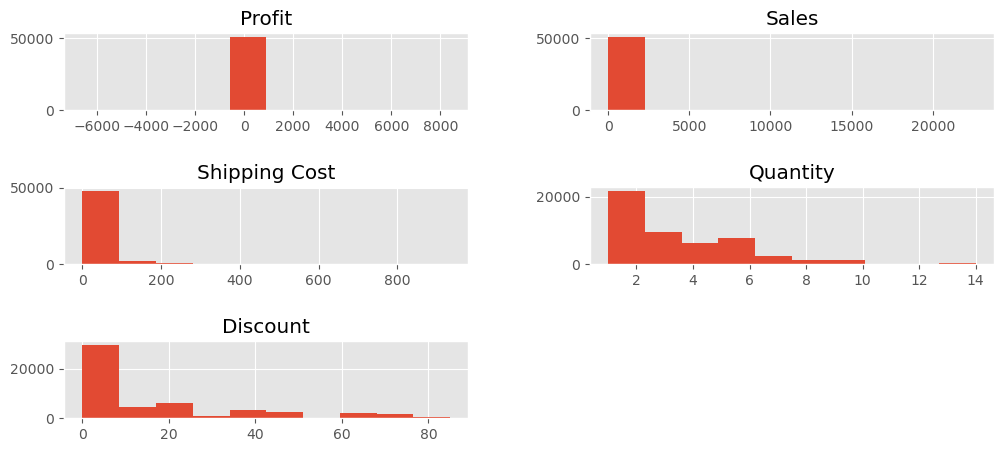

In [14]:
fig = plt.figure(figsize=(15,10))
target_numeric.hist()
plt.subplots_adjust(hspace=1)
plt.show()

Text(0.5, 1.0, 'Sales Distribution')

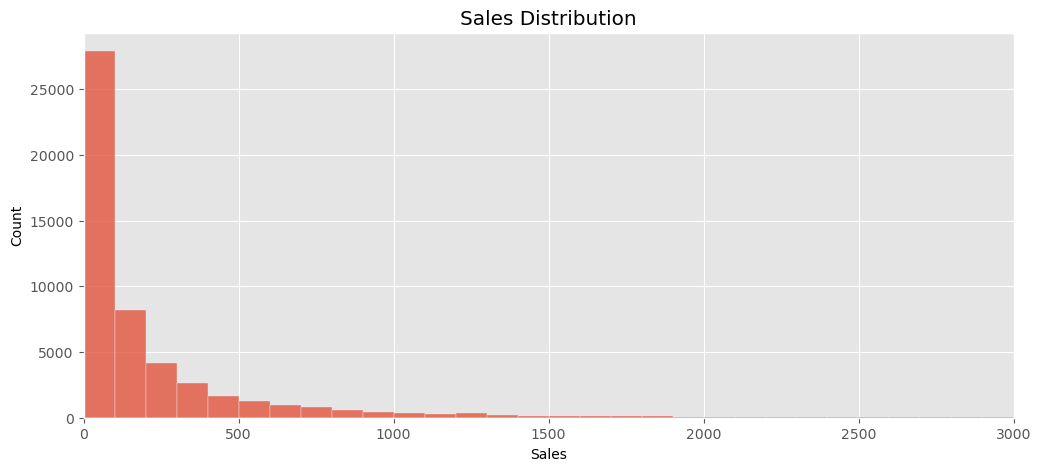

In [15]:
#distribution is heavily skewed to the right
n = target_numeric['Sales'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Sales'])-min(target_numeric['Sales']))/math.sqrt(n)

sales_dist = sns.histplot(data=target_numeric['Sales'], bins=bins, binwidth=bin_width)

sales_dist.set_xlim(0, 3000)
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Sales Distribution')

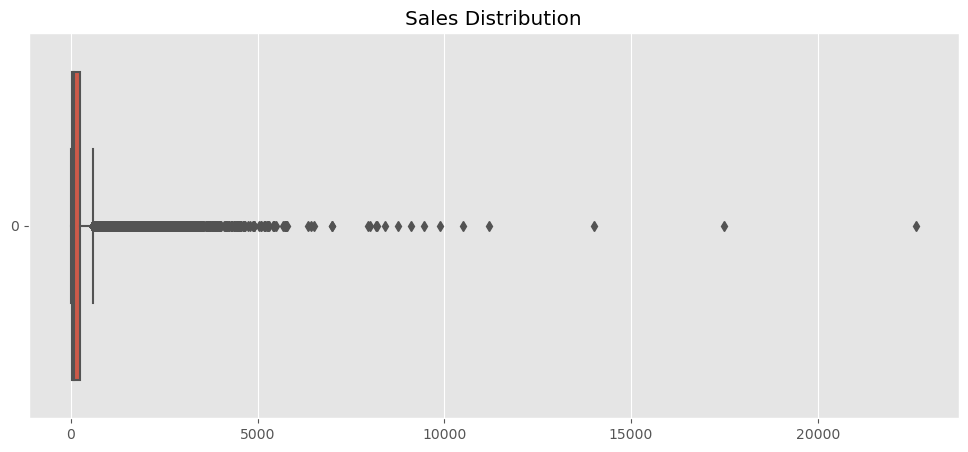

In [16]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Sales'], orient='h')
plt.title('Sales Distribution')

Text(0.5, 1.0, 'Profit Distribution')

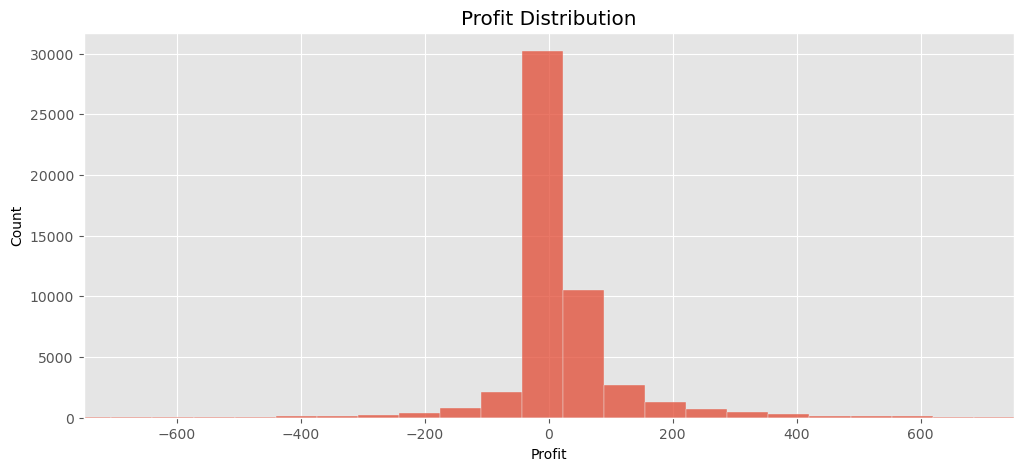

In [17]:
#distribution approximately normally distributed but seems to contain many outliers
n = target_numeric['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Profit'])-min(target_numeric['Profit']))/math.sqrt(n)

prof_dist = sns.histplot(data=target_numeric['Profit'], bins=bins, binwidth=bin_width)
prof_dist.set_xlim(-750,750)
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Profit Distribution')

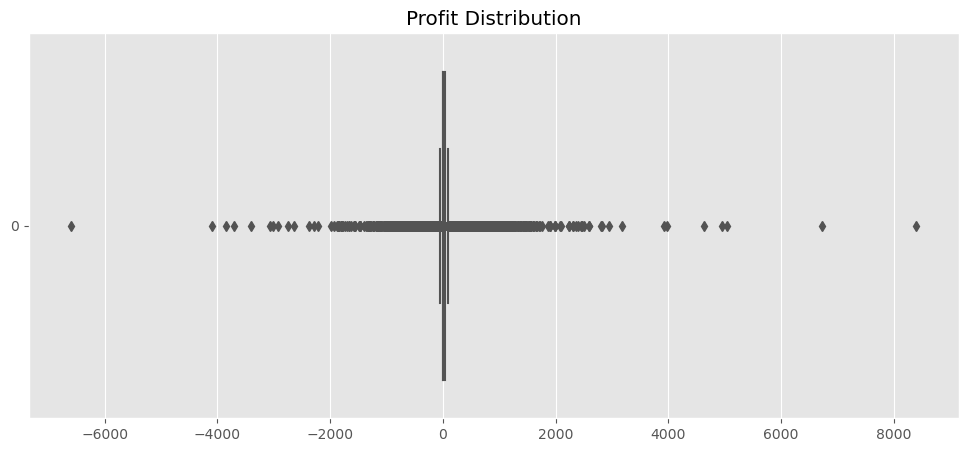

In [18]:
#there are many outliers but they will not be removed for this analysis
sns.boxplot(data=df['Profit'], orient='h')
plt.title('Profit Distribution')

# Metrics by the market #

<Axes: title={'center': 'Sales by Market'}, xlabel='Market', ylabel='Sales (billions)'>

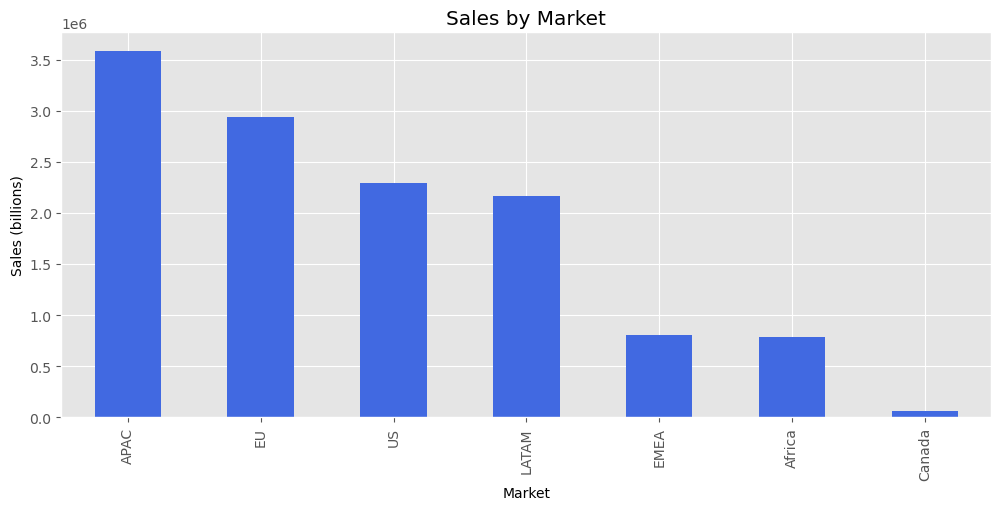

In [19]:
region_sales = df.groupby('Market')[['Sales']].sum().sort_values('Sales', ascending=False)
region_sales.plot(kind='bar', title='Sales by Market', ylabel='Sales (billions)',legend=False, color='royalblue')

<Axes: title={'center': 'Profit by Market'}, xlabel='Market', ylabel='Profit'>

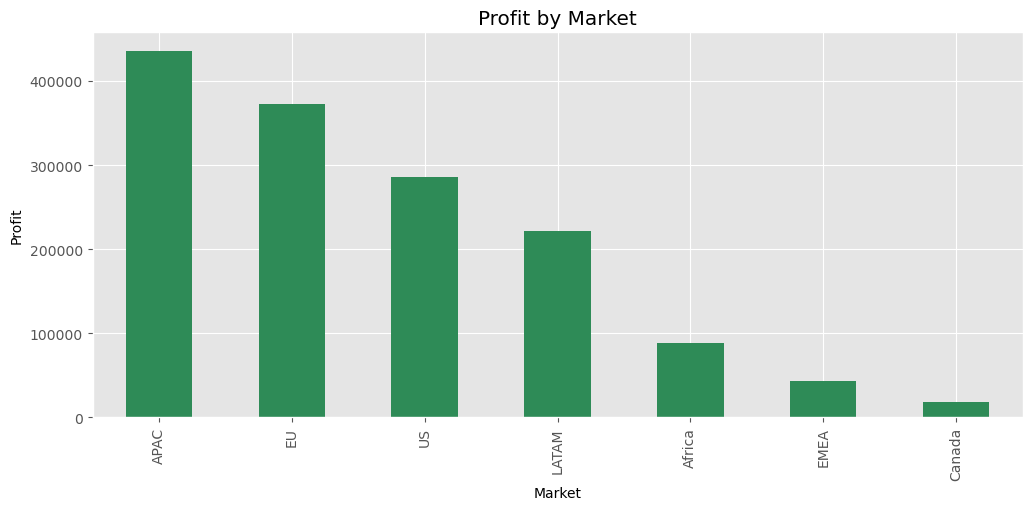

In [20]:
region_profit = df.groupby('Market')[['Profit']].sum().sort_values('Profit', ascending=False)
region_profit.plot(kind='bar', title='Profit by Market',ylabel='Profit', legend=False,color='seagreen')

<Axes: title={'center': 'Quantity sold by Market'}, xlabel='Market', ylabel='Quantity'>

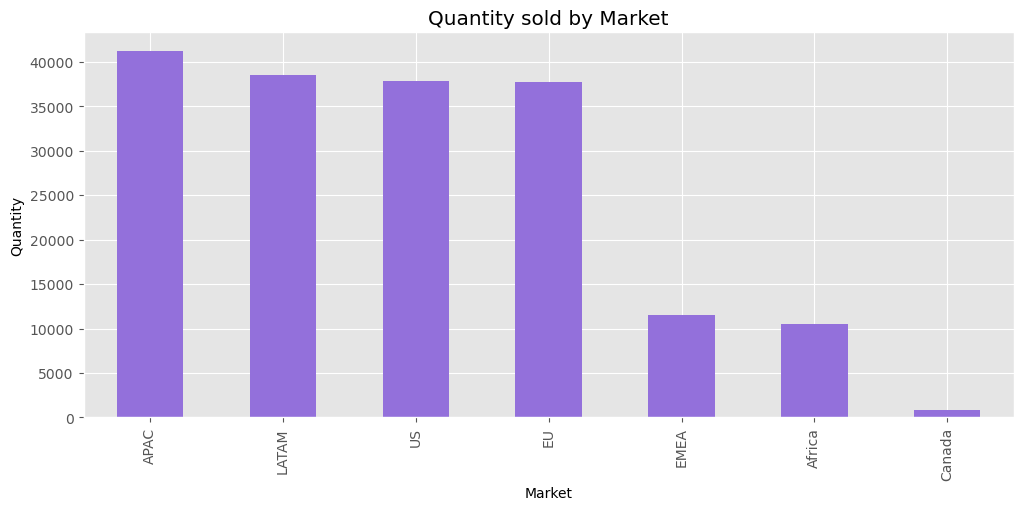

In [21]:
#quantity by region
region_quantity = df.groupby('Market')[['Quantity']].sum().sort_values('Quantity', ascending=False)
region_quantity.plot(kind='bar', title='Quantity sold by Market', ylabel='Quantity',legend=False, color='mediumpurple')

# Metrics by category #

<Axes: title={'center': 'Categories Ranked by Sales'}, xlabel='Category', ylabel='Sales'>

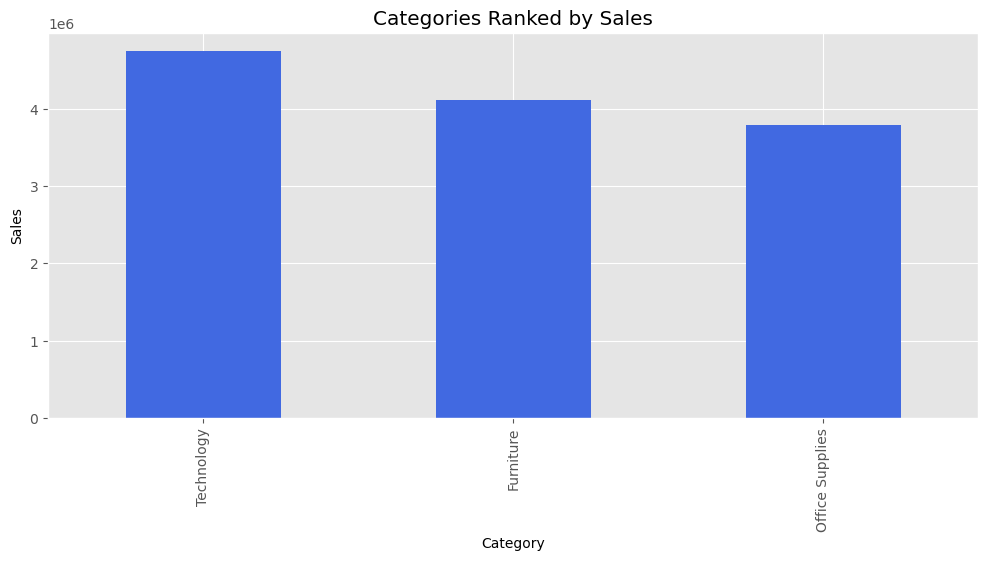

In [22]:
#categories
category_sales = df.groupby('Category')[['Sales']].sum().sort_values('Sales', ascending=False)
category_sales.plot(kind='bar', title='Categories Ranked by Sales', ylabel='Sales', legend=False, color='royalblue')

<Axes: title={'center': 'Categories Ranked by Profit'}, xlabel='Category', ylabel='Profit'>

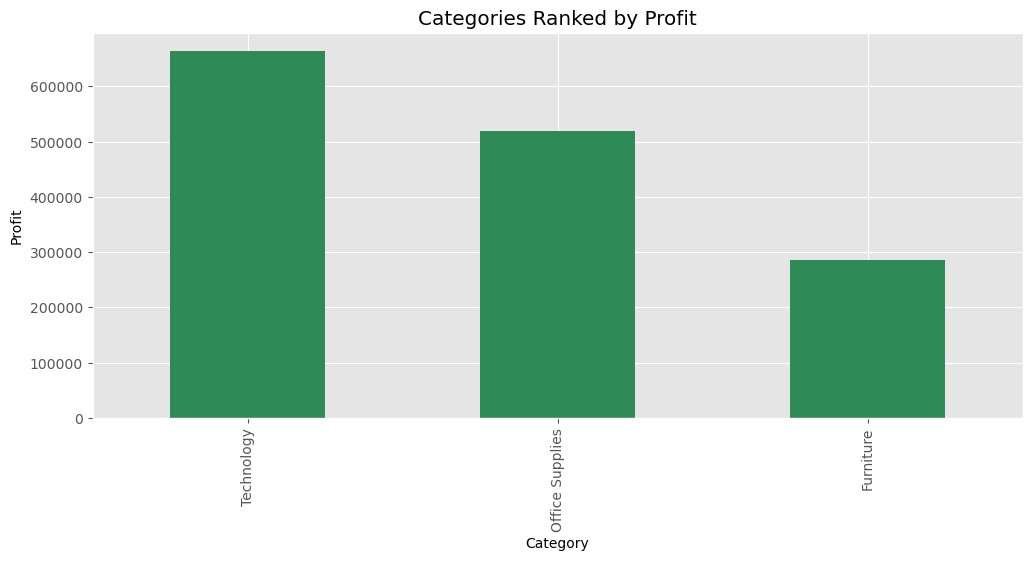

In [23]:
category_profit = df.groupby('Category')[['Profit']].sum().sort_values('Profit', ascending=False)
category_profit.plot(kind='bar', title='Categories Ranked by Profit', ylabel='Profit',legend=False, color='seagreen')

In [24]:
#creating time series features
year = df['Order Date'].str[-4::]
month = df['Order Date'].str[3:5]
df['Year'] = year
df['Month'] = month

In [25]:
df_2011 = df.loc[df['Year'] == '2011'].copy()
df_2012 = df.loc[df['Year'] == '2012'].copy()
df_2013 = df.loc[df['Year'] == '2013'].copy()
df_2014 = df.loc[df['Year'] == '2014'].copy()

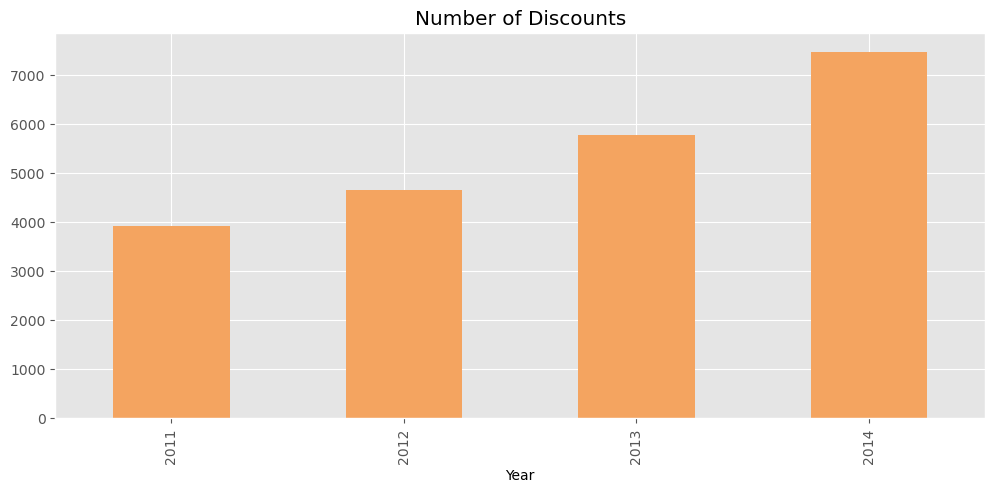

In [26]:
#what year had the most discounts?
disc_by_year = df.loc[df['Discount'] > 0].groupby('Year')[['Discount']].count()

disc_by_year.plot(kind='bar',legend=False, color='sandybrown')
plt.title('Number of Discounts')
plt.show()

# Analyzing the distribution of discount percentage and its relationship to sales and profit #

## What percentage of orders are profitable? ##

In [27]:
#21820 entries with discounts
discount_df = df.loc[df['Discount'] > 0].copy()
discount_df.shape

(21820, 26)

In [28]:
#what percentage of total orders are profitable
percent_profitable = 100 * (len(df.loc[df['Profit'] > 0])/len(df))
not_profitable =  100 * (1 - (percent_profitable/100))

#what percent discounted
percent_discounted = 100 * (len(discount_df)/len(df))
not_disc = 100 * (1 - (percent_discounted/100))


#discounted w/ profit/sales > 0%
disc_profitable = 100 * (len(discount_df.loc[discount_df['Profit'] > 0])/len(discount_df))
not_prof_disc = 100 * (1 - (disc_profitable/100))

#discounted w/ profit/sales >30%
disc_profitable30 = 100 * (len(discount_df.loc[(discount_df['Profit']/discount_df['Sales']) > 0.3])/len(discount_df))
not_prof_disc30 = 100 * (1 - (disc_profitable30/100))

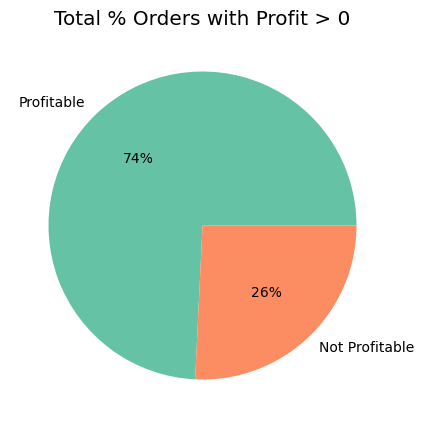

In [29]:
#total profitable orders
plt.pie(x=[percent_profitable, not_profitable], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), 
        autopct='%.0f%%')
plt.title('Total % Orders with Profit > 0')
plt.show()

In [30]:
#what percentage of total orders have a sales/profit ratio of at least 30%
percent_prof = 100 * (len(df.loc[(df['Profit']/df['Sales'])>0.3])/len(df))
not_prof =  100 * (1 - (percent_prof/100))

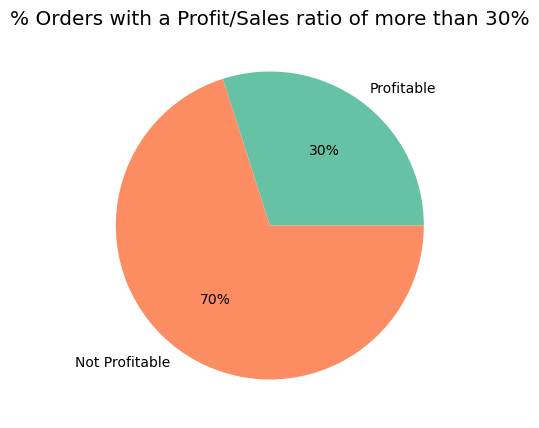

In [31]:
plt.pie(x=[percent_prof, not_prof], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), 
        autopct='%.0f%%')
plt.title('% Orders with a Profit/Sales ratio of more than 30%')
plt.show()

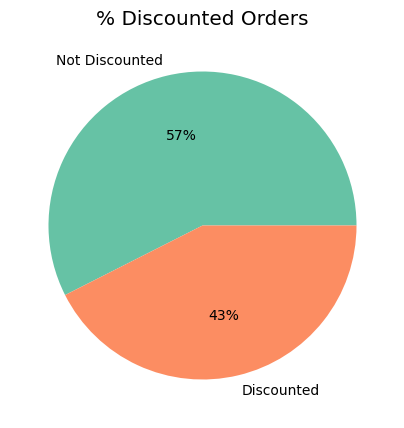

In [32]:
#percent discounted
#total profitable orders
plt.pie(x=[not_disc, percent_discounted], labels=['Not Discounted','Discounted'], colors=sns.color_palette('Set2'), 
        autopct='%.0f%%')
plt.title('% Discounted Orders')
plt.show()

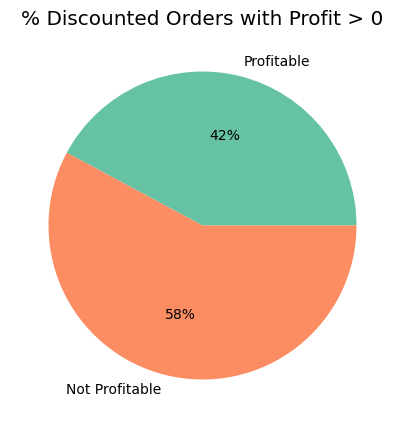

In [33]:
plt.pie(x=[disc_profitable, not_prof_disc], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), 
        autopct='%.0f%%')
plt.title('% Discounted Orders with Profit > 0')
plt.show()

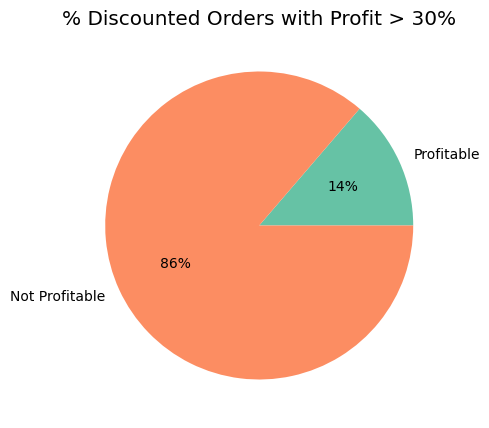

In [34]:
plt.pie(x=[disc_profitable30, not_prof_disc30], labels=['Profitable','Not Profitable'], colors=sns.color_palette('Set2'), 
        autopct='%.0f%%')
plt.title('% Discounted Orders with Profit > 30%')
plt.show()

In [35]:
disc_percentages = df['Discount'].unique()
disc_percentages = np.delete(disc_percentages,0)
disc_percentages.sort()
total_count = len(df)

discount_count = []
prop_percents = []
    
for perc in disc_percentages:
    disc_count = len(discount_df.loc[discount_df['Discount'] == perc]) #total number of discounts
    proportion_percent = 100 * disc_count / total_count #% of orders discounted

    discount_count.append(disc_count)
    prop_percents.append(proportion_percent)

In [36]:
#dataframe of discount percentage
discount_info = pd.DataFrame()
discount_info['Discount'] = disc_percentages
discount_info['Count'] = discount_count
discount_info['Proportion Percent'] = prop_percents

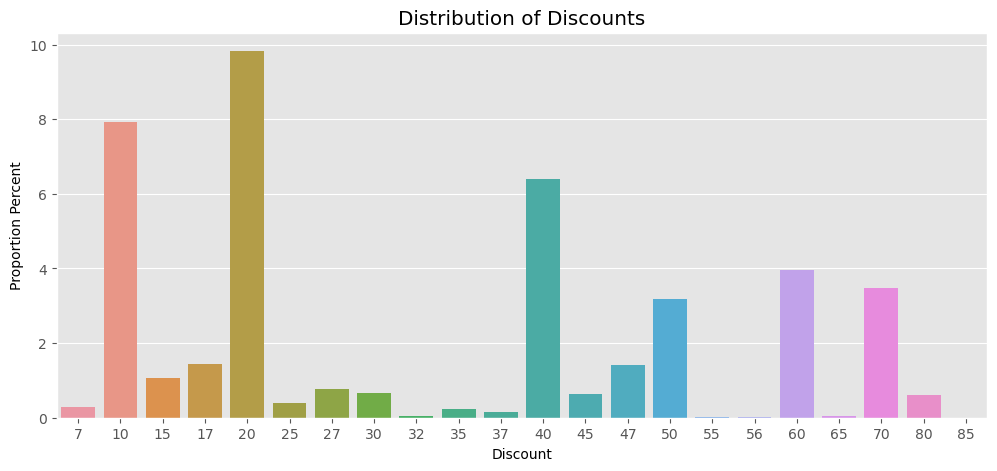

In [37]:
sns.barplot(data=discount_info, x='Discount', y='Proportion Percent')
plt.title("Distribution of Discounts")
plt.show()

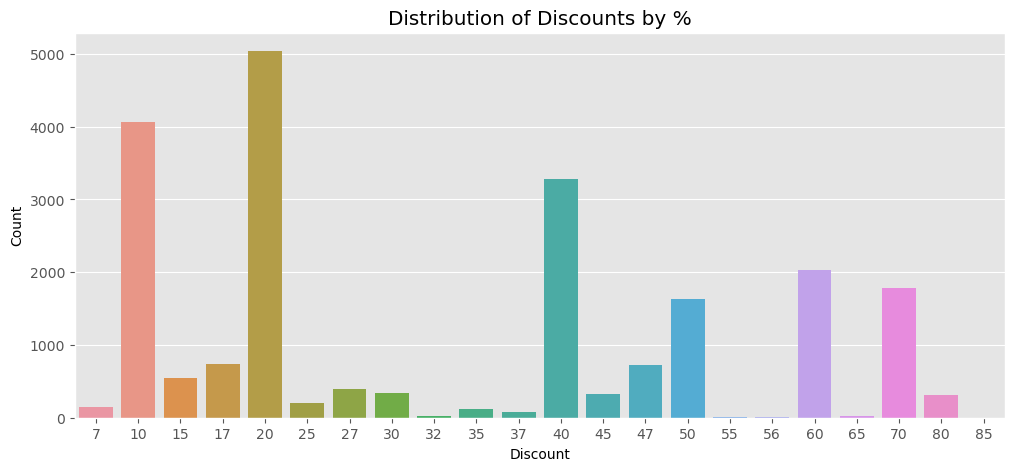

In [38]:
sns.barplot(data=discount_info, x='Discount', y='Count')
plt.title("Distribution of Discounts by %")
plt.show()

In [39]:
#sales at each percent
sum_sales = []
sum_prof = []

for perc in disc_percentages:
    sales = sum(discount_df['Sales'].loc[discount_df['Discount'] == perc])
    profit = sum(discount_df['Profit'].loc[discount_df['Discount'] == perc])
    sum_sales.append(sales)
    sum_prof.append(profit)

sums = pd.DataFrame()
sums['Discount'] = disc_percentages
sums['Total Sales'] = sum_sales
sums['Total Profit'] = sum_prof

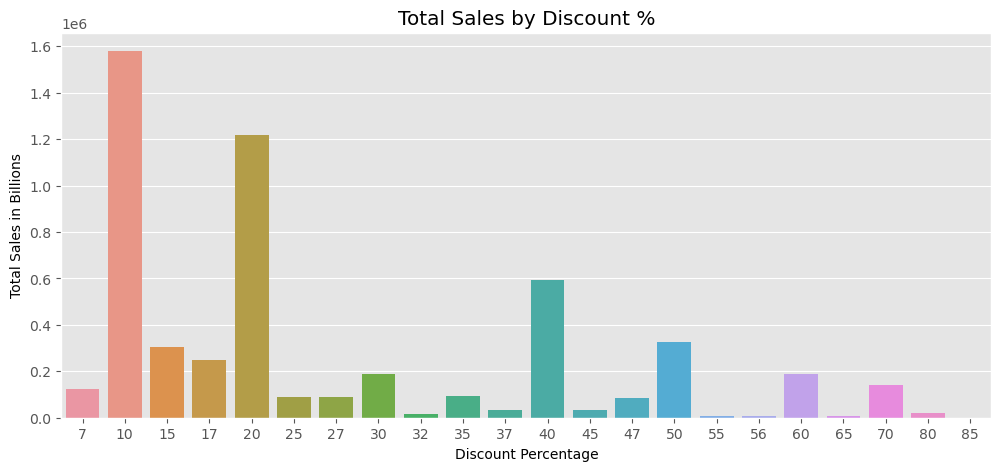

In [40]:
sns.barplot(data=sums, x='Discount', y='Total Sales')
plt.title("Total Sales by Discount %")
plt.ylabel('Total Sales in Billions')
plt.xlabel('Discount Percentage')
plt.show()

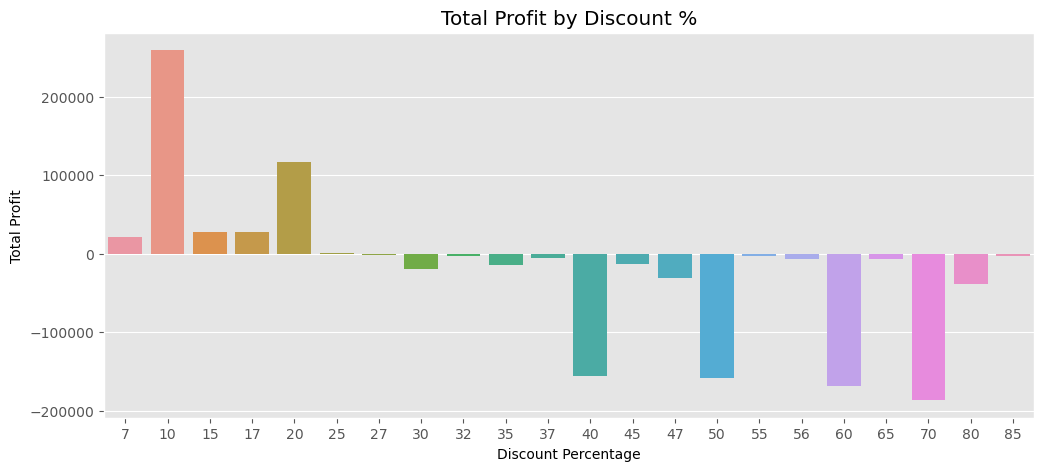

In [41]:
sns.barplot(data=sums, x='Discount', y='Total Profit')
plt.title("Total Profit by Discount %")
plt.ylabel('Total Profit')
plt.xlabel('Discount Percentage')
plt.show()

## percentage of orders that have a sales / profit of a given ratio

In [42]:
def prof_at_percent(margin):
    disc_percentages = df['Discount'].unique()
    disc_percentages = np.delete(disc_percentages, 0)
    disc_percentages.sort()
    margin = margin/100
    margin_df = discount_df.loc[discount_df['Profit']/discount_df['Sales'] > margin]
    
    discount_count = []
    discount_proportion = []
    prop_percents = []
    
    for perc in disc_percentages:
        total_count = len(discount_df.loc[discount_df['Discount'] == perc]) #total number of discounts by %
        prof_count = len(margin_df.loc[margin_df['Discount'] == perc]) #number of profitable discounts by % 
        proportion_percent = 100 * prof_count / total_count
        
        discount_count.append(total_count)
        discount_proportion.append(prof_count)
        prop_percents.append(proportion_percent)
        
        
    profitable_df = pd.DataFrame()
    profitable_df['Discount'] = disc_percentages
    profitable_df['Count'] = discount_count
    profitable_df['Proportion'] = discount_proportion
    profitable_df['Proportion Percent'] = prop_percents
    
    sns.barplot(data=profitable_df, x='Discount', y='Proportion Percent')
    plt.title(f'% orders that have a Profit/Sales Ratio of at least {margin*100}%')
    plt.show()

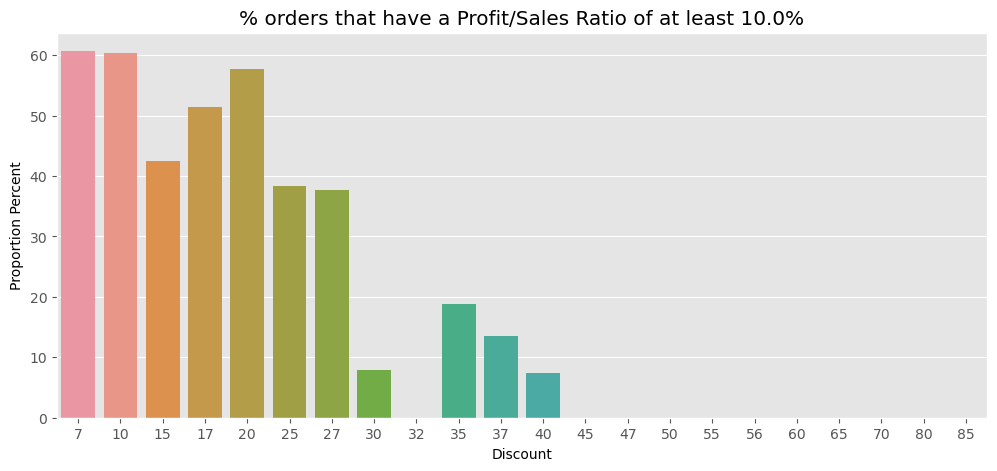

In [43]:
prof_at_percent(10)

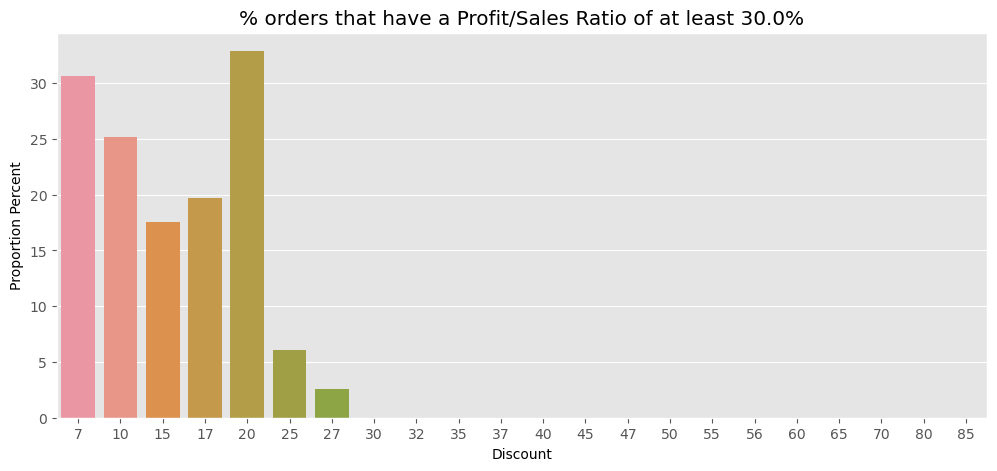

In [44]:
prof_at_percent(30)

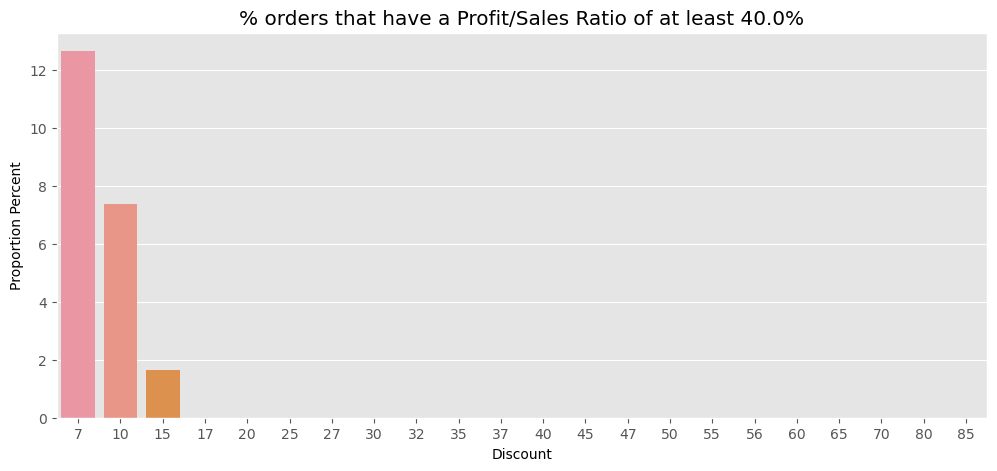

In [45]:
prof_at_percent(40)

#what proportion does each discount percentage make
disc_percentages = df['Discount'].unique()
disc_percentages.sort()
disc_percentages = np.delete(disc_percentages, 0)
prop_num = []
proportions = []
perc_prof = []



for perc in disc_percentages:
    #distribution of discount percentages
    num = len(discount_df.loc[discount_df['Discount'] == perc]) #count
    prop = 100 * num / len(discount_df['Discount']) #proportion
    prop_num.append(num)
    proportions.append(prop)
    
    #percent of orders at this percent that have a profit of >=30%
    prof_len = len(discount_df.loc[(discount_df['Discount'] == perc) & (discount_df['Profit'] > 0)])
    perc_len = len(discount_df.loc[discount_df['Discount']== perc])
    prof = 100 * (prof_len/perc_len)
    perc_prof.append(prof)

# Time series analysis of discounts, orders, sales, and profit #

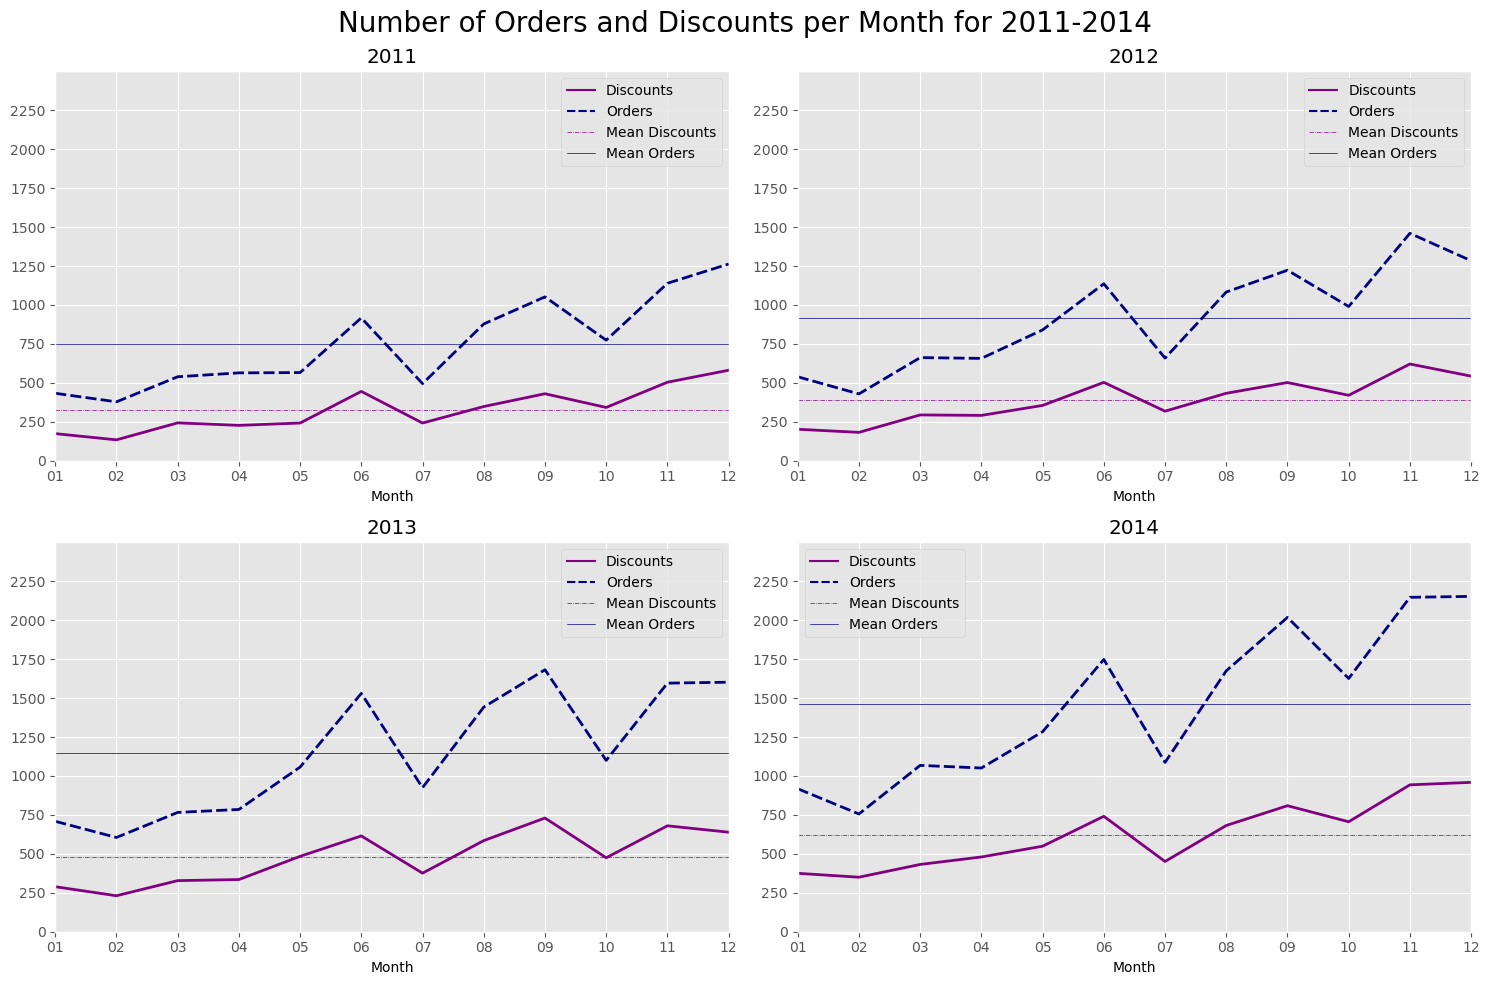

In [46]:
#time series of # of discounts 
fig, ax = plt.subplots(2,2,figsize=(15,10))
y_ticks = np.arange(0,2500,250)
colors = sns.color_palette(['purple','navy'])

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
date_group = df_2011.groupby('Month')[['Sales']].count()
discounts = df_2011.loc[df['Discount'] > 0].groupby('Month')[['Discount']].count()
df_11 = pd.concat([discounts, date_group],axis=1)
df_11 = df_11.rename(columns={'Sales':'Orders'})
a = sns.lineplot(data=df_11, palette=colors, linewidth=2) #plot
a.set_ylim(0, 2500)

mean_discounts = df_11['Discount'].mean() #mean discounts
mean_orders = df_11['Orders'].mean() #mean orders
plt.axhline(mean_discounts, color='purple', linestyle='-.', label='Mean Discounts', linewidth=0.5) #mean discounts
plt.axhline(mean_orders, color='navy', label='Mean Orders', linewidth=0.5) #mean orders
labels = ['Discounts','Orders','Mean Discounts','Mean Orders']
handles, _ = a.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
date_group = df_2012.groupby('Month')[['Sales']].count()
discounts = df_2012.loc[df['Discount'] > 0].groupby('Month')[['Discount']].count()
df_12 = pd.concat([discounts, date_group],axis=1)
df_12 = df_12.rename(columns={'Sales':'Orders'})
b = sns.lineplot(data=df_12, palette=colors, linewidth=2)
b.set_ylim(0, 2500)

mean_discounts = df_12['Discount'].mean() #mean discounts
mean_orders = df_12['Orders'].mean() #mean orders
plt.axhline(mean_discounts, color='purple', linestyle='-.', label='Mean Discounts', linewidth=0.5) #mean discounts
plt.axhline(mean_orders, color='navy', label='Mean Orders', linewidth=0.5) #mean orders
labels = ['Discounts','Orders','Mean Discounts','Mean Orders']
handles, _ = b.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
date_group = df_2013.groupby('Month')[['Sales']].count()
discounts = df_2013.loc[df['Discount'] > 0].groupby('Month')[['Discount']].count()
df_13 = pd.concat([discounts, date_group],axis=1)
df_13 = df_13.rename(columns={'Sales':'Orders'})
c = sns.lineplot(data=df_13, palette=colors, linewidth=2)
c.set_ylim(0, 2500)

mean_discounts = df_13['Discount'].mean() #mean discounts
mean_orders = df_13['Orders'].mean() #mean orders
plt.axhline(mean_discounts, color='purple', linestyle='-.', label='Mean Discounts', linewidth=0.5) #mean discounts
plt.axhline(mean_orders, color='navy', label='Mean Orders', linewidth=0.5) #mean orders
labels = ['Discounts','Orders','Mean Discounts','Mean Orders']
handles, _ = c.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
date_group = df_2014.groupby('Month')[['Sales']].count()
discounts = df_2014.loc[df['Discount'] > 0].groupby('Month')[['Discount']].count()
df_14 = pd.concat([discounts, date_group],axis=1)
df_14 = df_14.rename(columns={'Sales':'Orders'})
d = sns.lineplot(data=df_14, palette=colors, linewidth=2)
d.set_ylim(0, 2500)

mean_discounts = df_14['Discount'].mean() #mean discounts
mean_orders = df_14['Orders'].mean() #mean orders
plt.axhline(mean_discounts, color='purple', linestyle='-.', label='Mean Discounts', linewidth=0.5) #mean discounts
plt.axhline(mean_orders, color='navy', label='Mean Orders', linewidth=0.5) #mean orders
labels = ['Discounts','Orders','Mean Discounts','Mean Orders']
handles, _ = d.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
fig.suptitle('Number of Orders and Discounts per Month for 2011-2014', fontsize=20)
fig.tight_layout()
plt.show()

## highest absolute value profit by discount percentage ##

In [47]:
grouped = df.groupby(['Discount','Month']).agg(
    counts = ('Sales', 'count'),
    sum_profit = ('Profit', 'sum')
    )
grouped.reset_index(inplace=True)
grouped

Discount Month  counts    sum_profit
0           0    01    1559   96795.42800
1           0    02    1271   88919.71670
2           0    03    1738  114494.15812
3           0    04    1724   95384.17112
4           0    05    2117  127986.85458
..        ...   ...     ...           ...
245        80    10      30   -1329.96080
246        80    11      43   -4886.68130
247        80    12      34   -5763.20850
248        85    05       1   -1924.54200
249        85    11       1   -1144.11600

[250 rows x 4 columns]

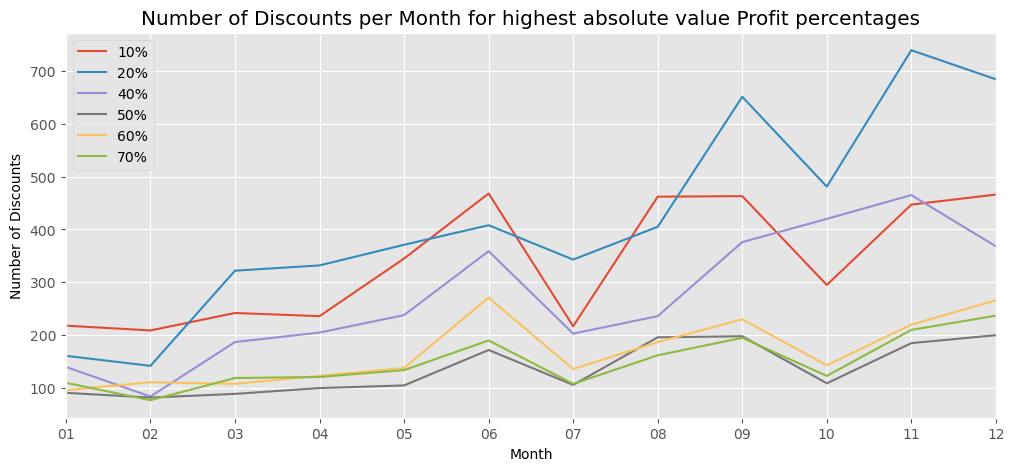

In [48]:
ten = grouped.loc[grouped['Discount'] == 10]
twenty = grouped.loc[grouped['Discount'] == 20]
fourty = grouped.loc[grouped['Discount'] == 40]
fifty = grouped.loc[grouped['Discount'] == 50]
sixty = grouped.loc[grouped['Discount'] == 60]
seventy = grouped.loc[grouped['Discount'] == 70]

sns.lineplot(data=ten, x='Month',y='counts',label='10%')
sns.lineplot(data=twenty, x='Month',y='counts',label='20%')
sns.lineplot(data=fourty, x='Month',y='counts',label='40%')
sns.lineplot(data=fifty, x='Month',y='counts',label='50%')
sns.lineplot(data=sixty, x='Month',y='counts',label='60%')
sns.lineplot(data=seventy, x='Month',y='counts',label='70%')

plt.ylabel('Number of Discounts')
plt.title('Number of Discounts per Month for highest absolute value Profit percentages')
plt.xlim(0,11)
plt.show()

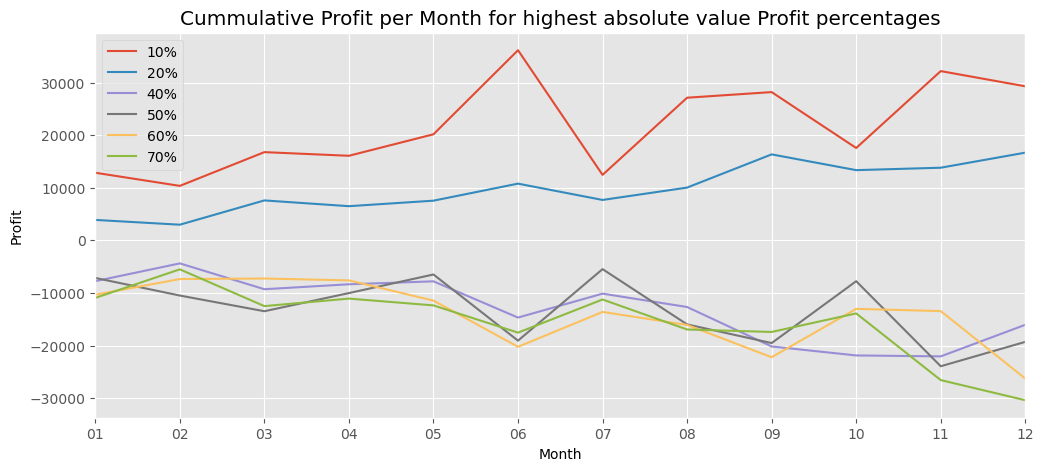

In [49]:
sns.lineplot(data=ten, x='Month',y='sum_profit',label='10%')
sns.lineplot(data=twenty, x='Month',y='sum_profit',label='20%')
sns.lineplot(data=fourty, x='Month',y='sum_profit',label='40%')
sns.lineplot(data=fifty, x='Month',y='sum_profit',label='50%')
sns.lineplot(data=sixty, x='Month',y='sum_profit',label='60%')
sns.lineplot(data=seventy, x='Month',y='sum_profit',label='70%')

plt.ylabel('Profit')
plt.title('Cummulative Profit per Month for highest absolute value Profit percentages')
plt.xlim(0,11)
plt.show()

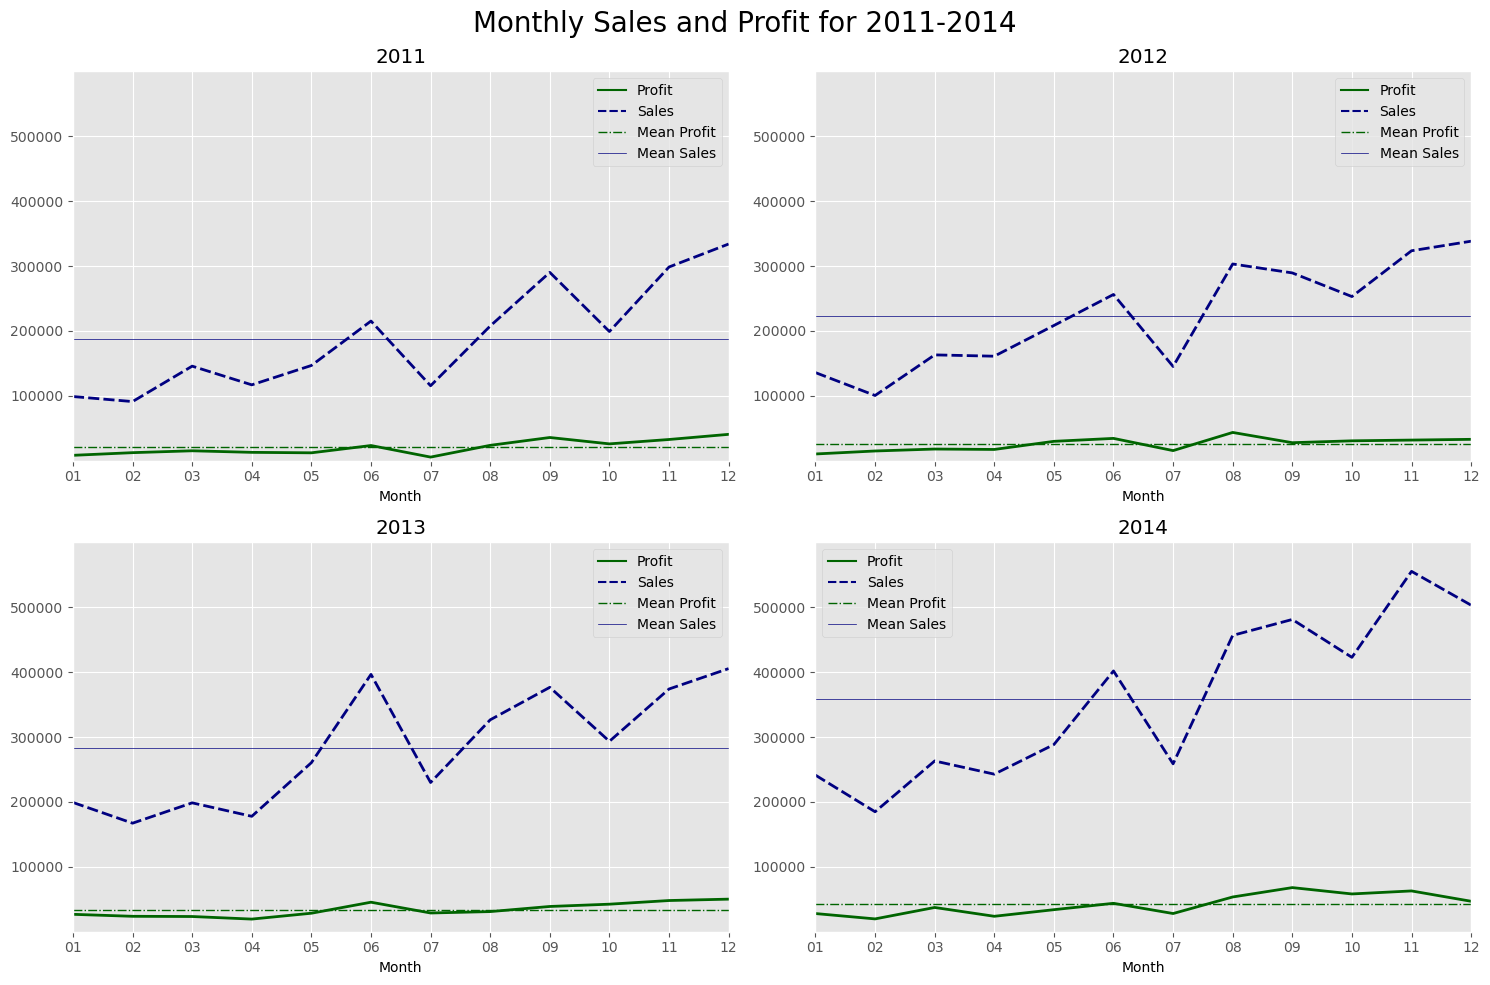

In [50]:
#when are overall sales the highest
fig, ax = plt.subplots(2,2,figsize=(15,10))
y_ticks = np.arange(100000,600000,100000)
colors = sns.color_palette(['darkgreen','navy'])

#2011
plt.subplot(2, 2, 1)
plt.title('2011')
sales = df_2011.groupby('Month')[['Sales']].sum()
profit = df_2011.groupby('Month')[['Profit']].sum()
df_11 = pd.concat([profit, sales], axis=1)
a = sns.lineplot(data=df_11, palette=colors, linewidth=2)
a.set_ylim(0,600000)

mean_sales = df_11['Sales'].mean() #mean sales
mean_profit = df_11['Profit'].mean() #mean profit
plt.axhline(mean_profit, color='darkgreen', linestyle='-.', label='Mean Profit', linewidth=1) #mean profit
plt.axhline(mean_sales, color='navy', label='Mean Sales', linewidth=0.5) #mean sales
labels = ['Profit','Sales','Mean Profit','Mean Sales']
handles, _ = a.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2012
plt.subplot(2, 2, 2)
plt.title('2012')
sales = df_2012.groupby('Month')[['Sales']].sum()
profit = df_2012.groupby('Month')[['Profit']].sum()
df_12 = pd.concat([profit, sales], axis=1)
b = sns.lineplot(data=df_12, palette=colors, linewidth=2)
b.set_ylim(0,600000)

mean_sales = df_12['Sales'].mean() #mean sales
mean_profit = df_12['Profit'].mean() #mean profit
plt.axhline(mean_profit, color='darkgreen', linestyle='-.', label='Mean Profit', linewidth=1) #mean profit
plt.axhline(mean_sales, color='navy', label='Mean Sales', linewidth=0.5) #mean sales
labels = ['Profit','Sales','Mean Profit','Mean Sales']
handles, _ = a.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2013
plt.subplot(2, 2, 3)
plt.title('2013')
sales = df_2013.groupby('Month')[['Sales']].sum()
profit = df_2013.groupby('Month')[['Profit']].sum()
df_13 = pd.concat([profit, sales], axis=1)
c = sns.lineplot(data=df_13, palette=colors, linewidth=2)
c.set_ylim(0,600000)

mean_sales = df_13['Sales'].mean() #mean sales
mean_profit = df_13['Profit'].mean() #mean profit
plt.axhline(mean_profit, color='darkgreen', linestyle='-.', label='Mean Profit', linewidth=1) #mean profit
plt.axhline(mean_sales, color='navy', label='Mean Sales', linewidth=0.5) #mean sales
labels = ['Profit','Sales','Mean Profit','Mean Sales']
handles, _ = a.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#2014
plt.subplot(2, 2, 4)
plt.title('2014')
sales = df_2014.groupby('Month')[['Sales']].sum()
profit = df_2014.groupby('Month')[['Profit']].sum()
df_14 = pd.concat([profit, sales], axis=1)
d = sns.lineplot(data=df_14, palette=colors, linewidth=2)
d.set_ylim(0,600000)

mean_sales = df_14['Sales'].mean() #mean sales
mean_profit = df_14['Profit'].mean() #mean profit
plt.axhline(mean_profit, color='darkgreen', linestyle='-.', label='Mean Profit', linewidth=1) #mean profit
plt.axhline(mean_sales, color='navy', label='Mean Sales', linewidth=0.5) #mean sales
labels = ['Profit','Sales','Mean Profit','Mean Sales']
handles, _ = a.get_legend_handles_labels()
plt.legend(handles = handles, labels = labels)
plt.yticks(y_ticks)
plt.xlim([0,11])

#subplot and title details
plt.subplots_adjust(left=0.1, bottom=0.01, right=0.9, top=0.9, wspace=0.4, hspace=0.5)
fig.suptitle('Monthly Sales and Profit for 2011-2014', fontsize=20)
fig.tight_layout()
plt.show()

# What factors most contribute to profit? #

## Determining the direction and strength of relationship between profit and other variables #

Text(0.5, 1.0, 'Features Correlating with Profit')

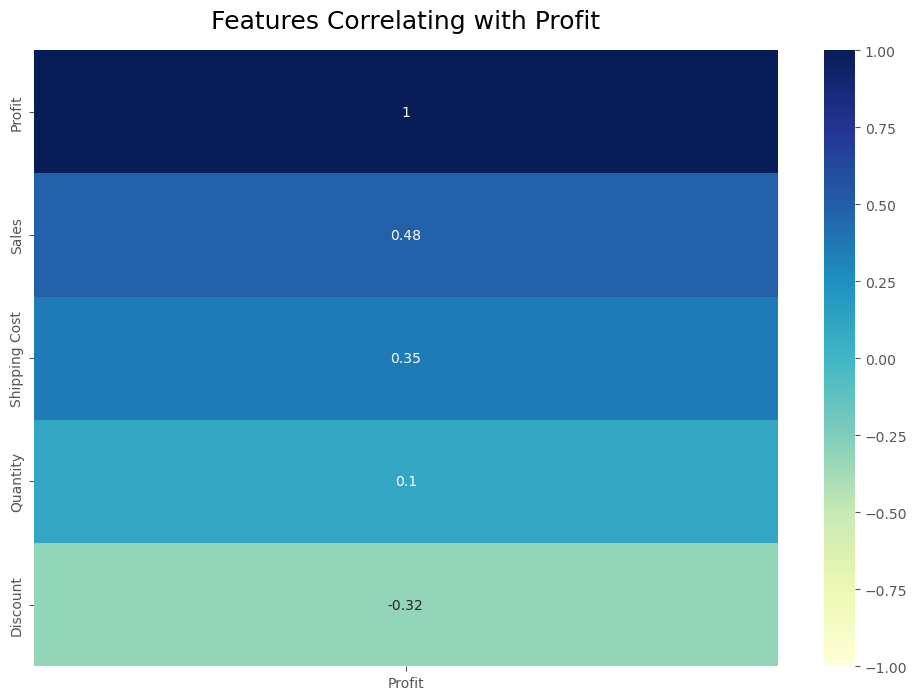

In [51]:
corr = target_numeric.corr()[['Profit']].sort_values(by='Profit', ascending=False)

plt.figure(figsize=(12,8))

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with Profit', fontdict={'fontsize':18}, pad=16)

<Figure size 1200x500 with 0 Axes>

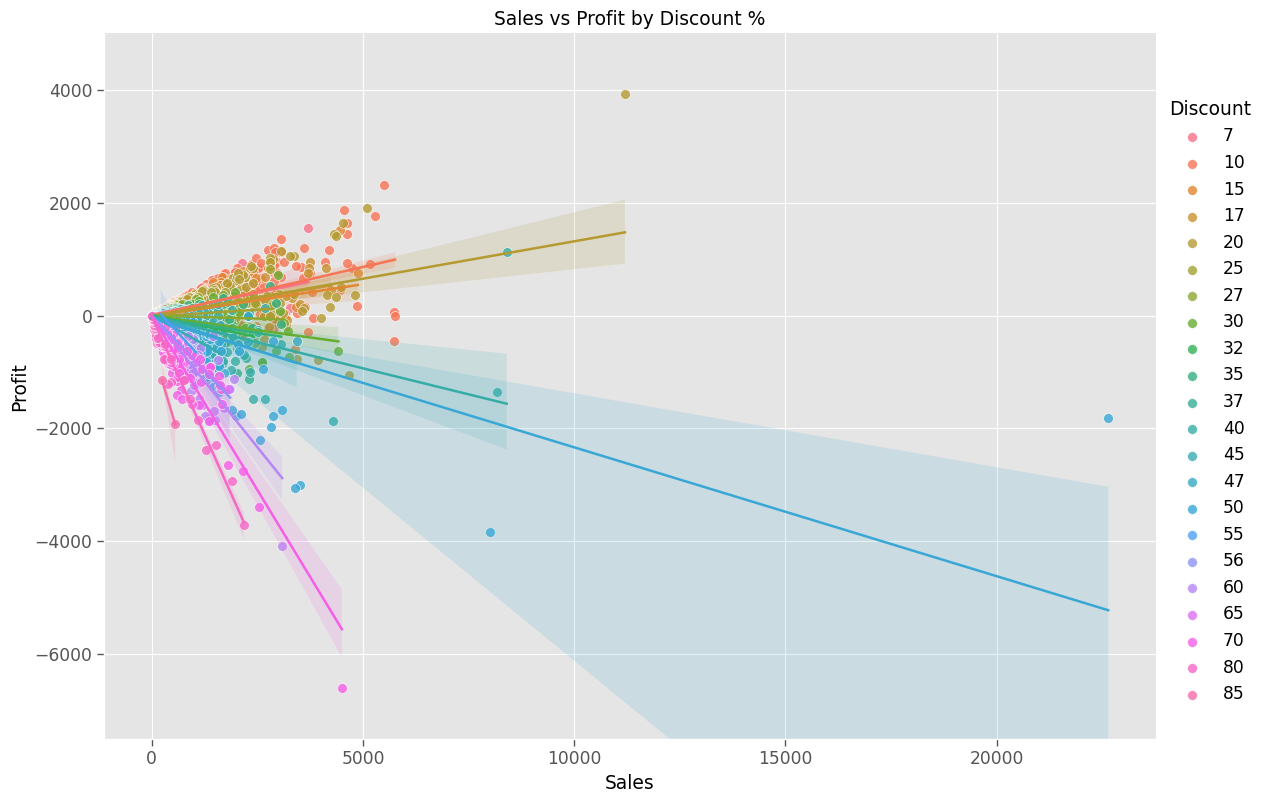

In [52]:
fig = plt.figure()

sns.set_context('paper', font_scale=1.4)
ax = sns.lmplot(x='Sales', y='Profit', data=discount_df, hue='Discount', height=8, aspect=1.5,
               scatter_kws=scatter_kw)

ax.set(ylim=(-7500,5000))

plt.title('Sales vs Profit by Discount %')
plt.show()

## choosing discount percent brackets ##

In [53]:
#grouping by discount percentage
low_disc = discount_df.loc[(discount_df['Discount'] >= 7) & (discount_df['Discount'] <= 20)].copy() #7-20
med_disc = discount_df.loc[(discount_df['Discount'] > 20) & (discount_df['Discount'] <= 50)].copy()#25-50
high_disc = discount_df.loc[discount_df['Discount'] > 50].copy() #55-85

In [54]:
#1-5,6-10,11-14
one_five = df.loc[(df['Quantity'] >= 1) & (df['Quantity'] <= 5)]
six_ten = df.loc[(df['Quantity'] >= 6) & (df['Quantity'] <= 10)]
eleven_fourteen = df.loc[df['Quantity'] >= 11]

## Kernel density estimate ##

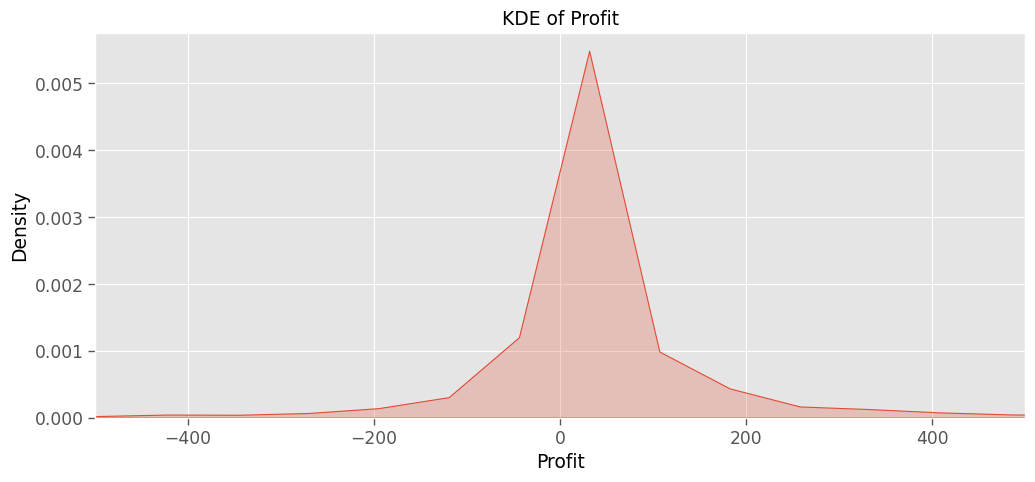

In [55]:
fig, ax = plt.subplots()
sns.kdeplot(df['Profit'], fill=True,bw_adjust=0.2)

ax.set_xlim(-500,500)

plt.title('KDE of Profit')
plt.show()

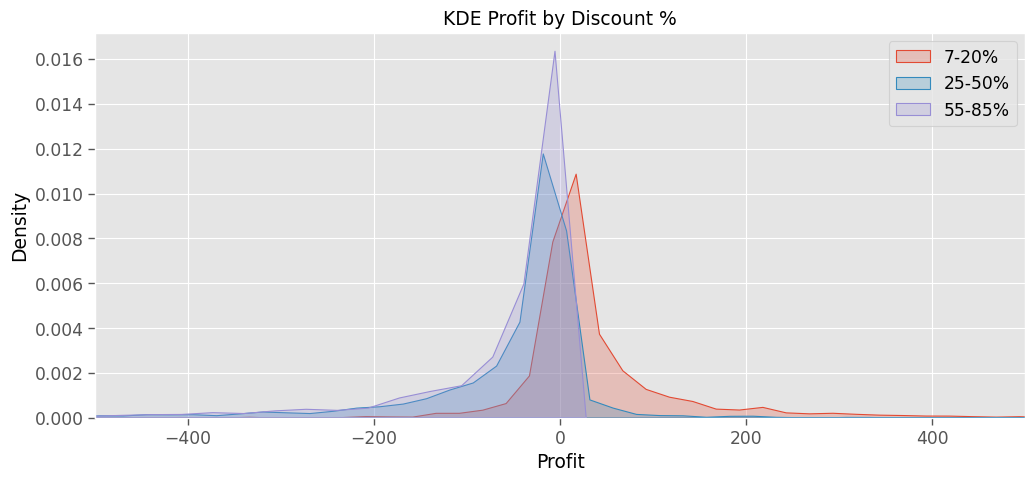

In [56]:
fig,ax = plt.subplots()

sns.kdeplot(low_disc['Profit'], label='7-20%', fill=True,bw_adjust=0.2)
sns.kdeplot(med_disc['Profit'], label='25-50%', fill=True,bw_adjust=0.2)
sns.kdeplot(high_disc['Profit'], label='55-85%', fill=True,bw_adjust=0.2)

ax.set_xlim(-500,500)
plt.title('KDE Profit by Discount %')
plt.legend()
plt.show()

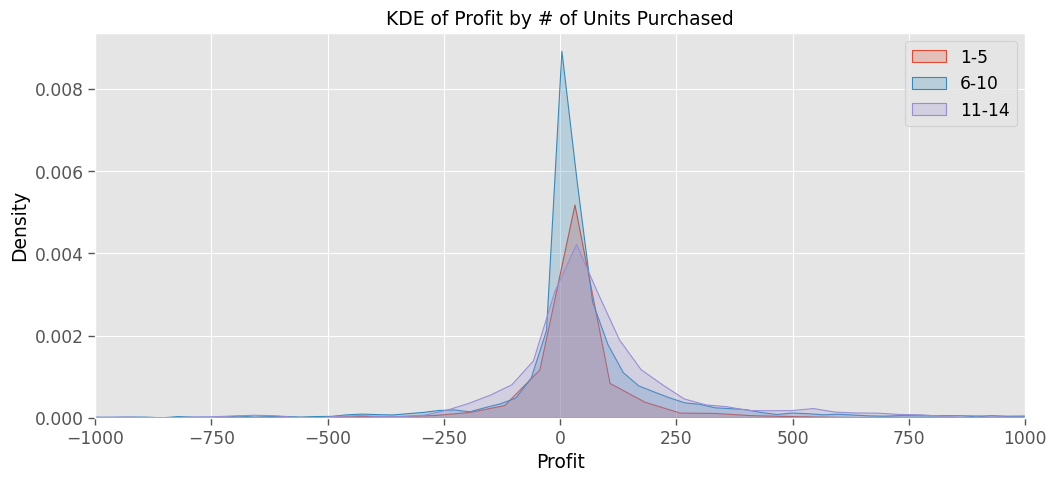

In [57]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Profit'], label='1-5', fill=True,bw_adjust=0.2)
sns.kdeplot(six_ten['Profit'], label='6-10', fill=True,bw_adjust=0.2)
sns.kdeplot(eleven_fourteen['Profit'], label='11-14', fill=True,bw_adjust=0.2)

ax.set_xlim(-1000,1000)
plt.title('KDE of Profit by # of Units Purchased')
plt.legend()
plt.show()

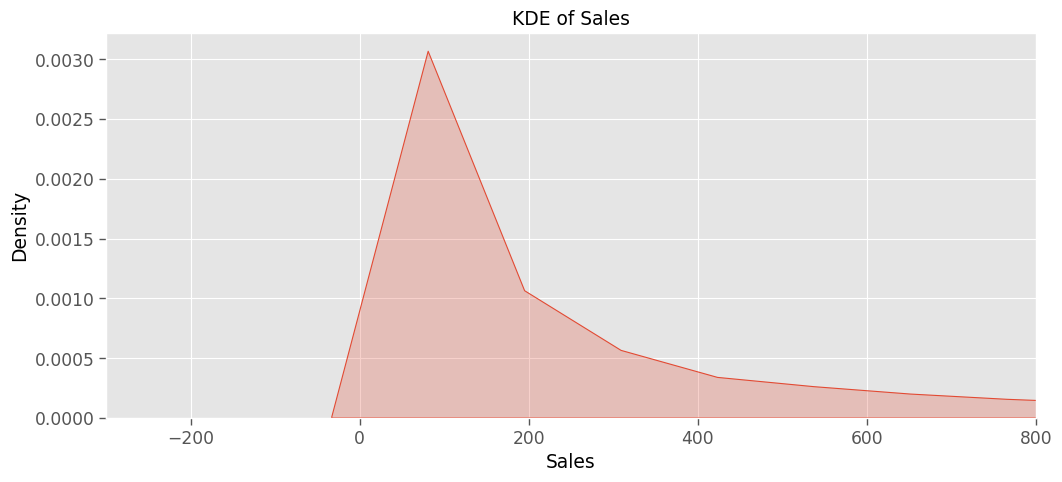

In [58]:
fig,ax = plt.subplots()

sns.kdeplot(df['Sales'], fill=True,bw_adjust=0.2)

ax.set_xlim(-300,800)
plt.title('KDE of Sales')
plt.show()

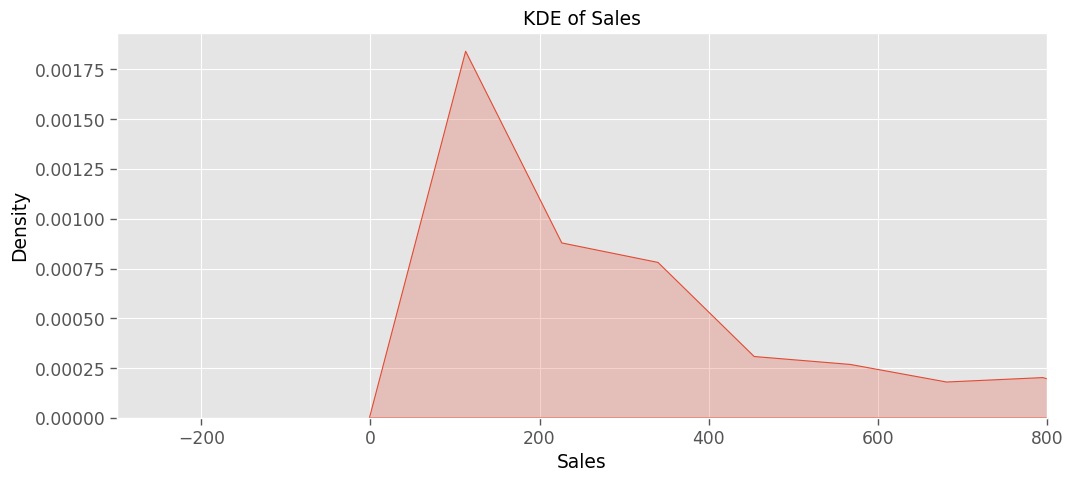

In [59]:
fig,ax = plt.subplots()

sns.kdeplot(df['Sales'], fill=True,bw_adjust=0.01)

ax.set_xlim(-300,800)
plt.title('KDE of Sales')
plt.show()

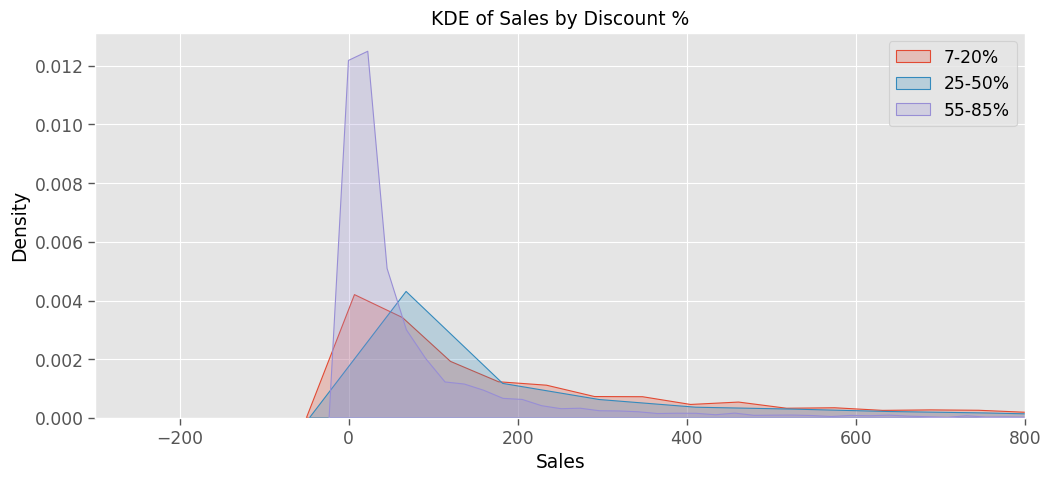

In [60]:
fig,ax = plt.subplots()

sns.kdeplot(low_disc['Sales'], label='7-20%', fill=True,bw_adjust=0.2)
sns.kdeplot(med_disc['Sales'], label='25-50%', fill=True,bw_adjust=0.2)
sns.kdeplot(high_disc['Sales'], label='55-85%', fill=True,bw_adjust=0.2)

ax.set_xlim(-300,800)
plt.title('KDE of Sales by Discount %')
plt.legend()
plt.show()

In [61]:
def getProb(metric, discount, spent):
    plt.figure(figsize=(15,10))
    
    #data for distribution
    data = df[metric].loc[df['Discount'] == discount]
    
    #kde
    sns.kdeplot(data=data,bw_adjust=0.2,alpha=0.5, linewidth=2, fill=True, color='mediumspringgreen')
    ax = sns.kdeplot(data=data, bw_adjust=0.2, alpha=1, color='mediumspringgreen') #reference for mask
    
    kde_lines = ax.get_lines()[-1]
    kde_x, kde_y = kde_lines.get_data()
    x, y = sns.kdeplot(data, linewidth=0).get_lines()[0].get_data() #reference for annotation
    f = np.interp(1, x, y) #get y for annotation
    
    #mask for area calculation
    mask = kde_x >= spent
    filled_x, filled_y = kde_x[mask], kde_y[mask]
    area = round(np.trapz(filled_y, filled_x)*100,2)
    ax.fill_between(filled_x, y1=filled_y, alpha=1, facecolor='royalblue', lw=0)
    
    axline = plt.axvline(x=spent, linewidth=2, linestyle='--', color='mediumpurple', label=f'${spent}')
    
    plt.title(f'Probability of at least ${spent} in {metric} at {discount}% Discount')
    plt.xlabel('$')
    plt.ylabel('')
    
    #legend details
    kde = mpatches.Patch(color='mediumspringgreen', label=f'{metric}')
    prob = mpatches.Patch(color='royalblue', label=f'Probability: {area}%')
    
    plt.legend(handles=[kde,prob,axline])
    plt.show()

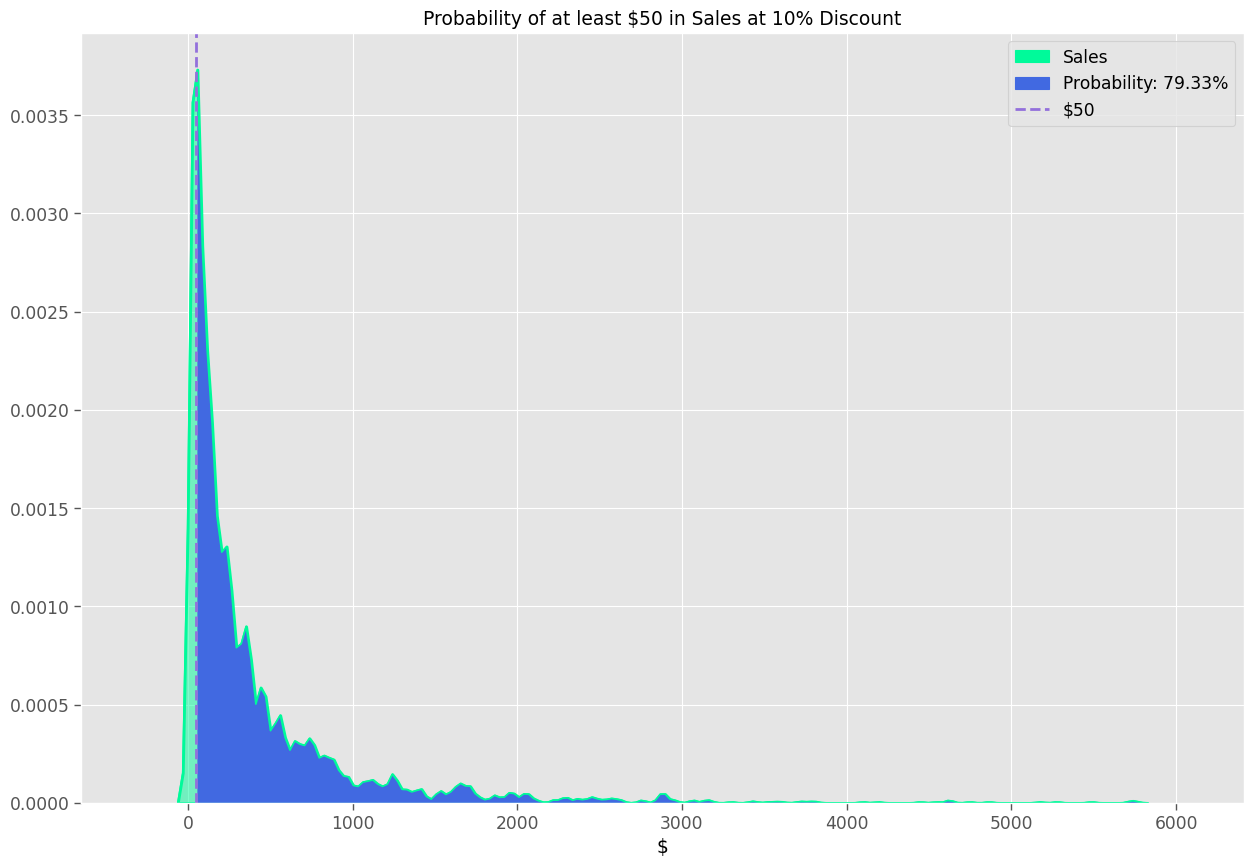

In [62]:
getProb('Sales',10,50)

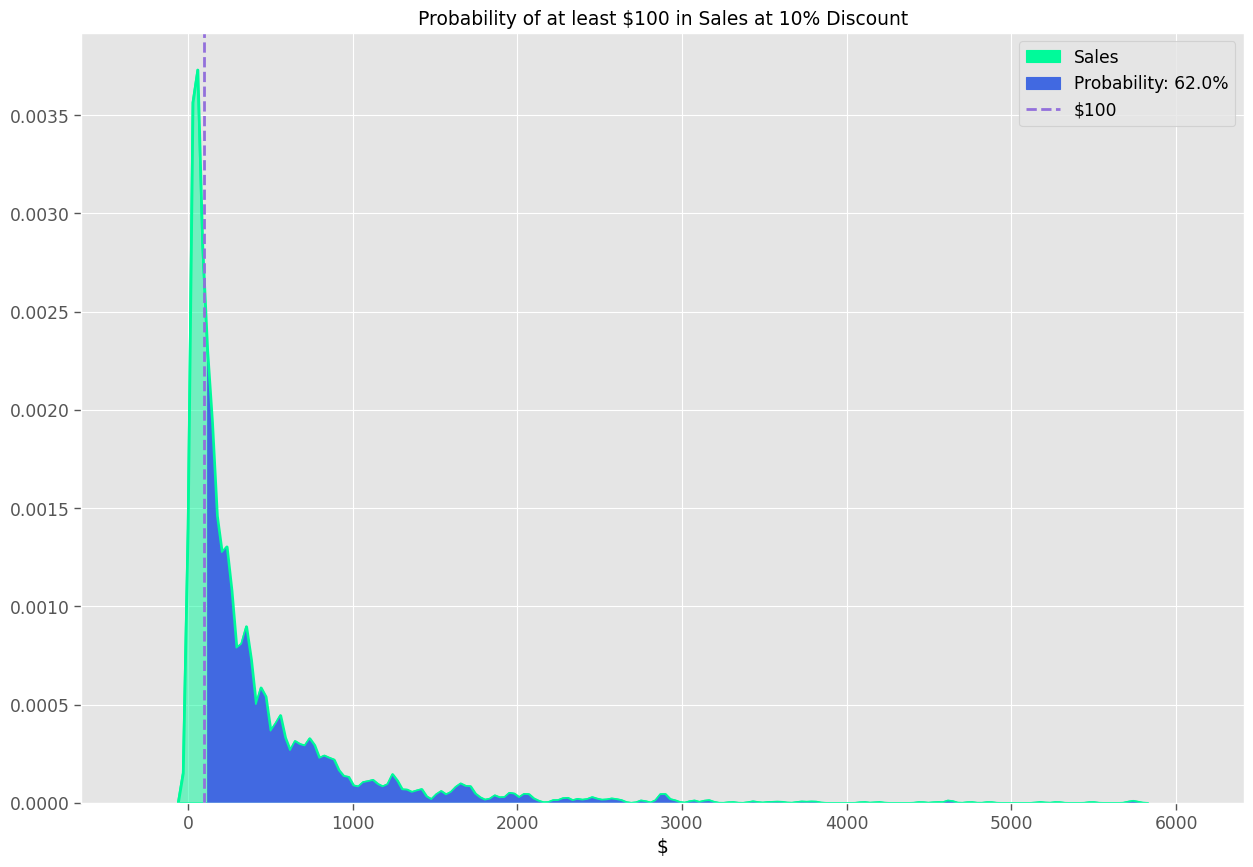

In [63]:
getProb('Sales',10,100)

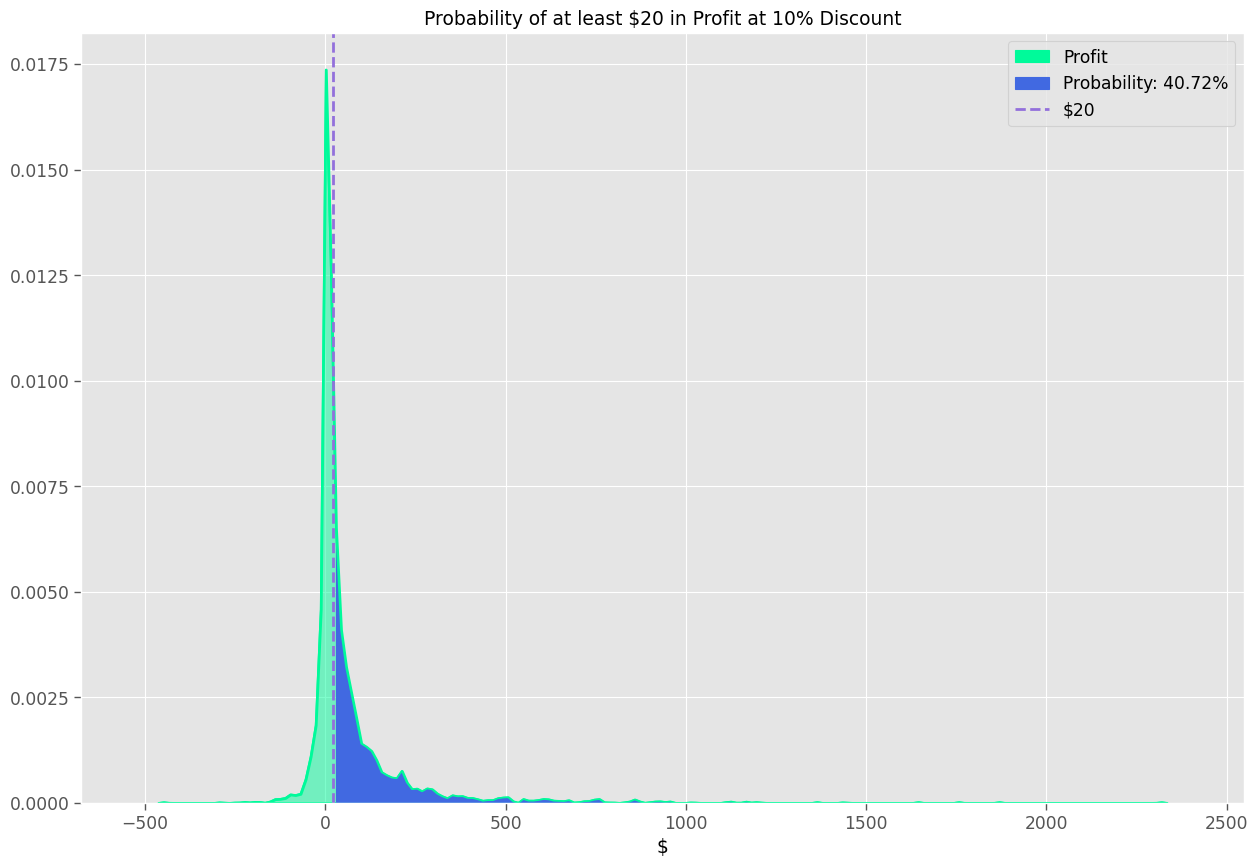

In [64]:
getProb('Profit',10,20)

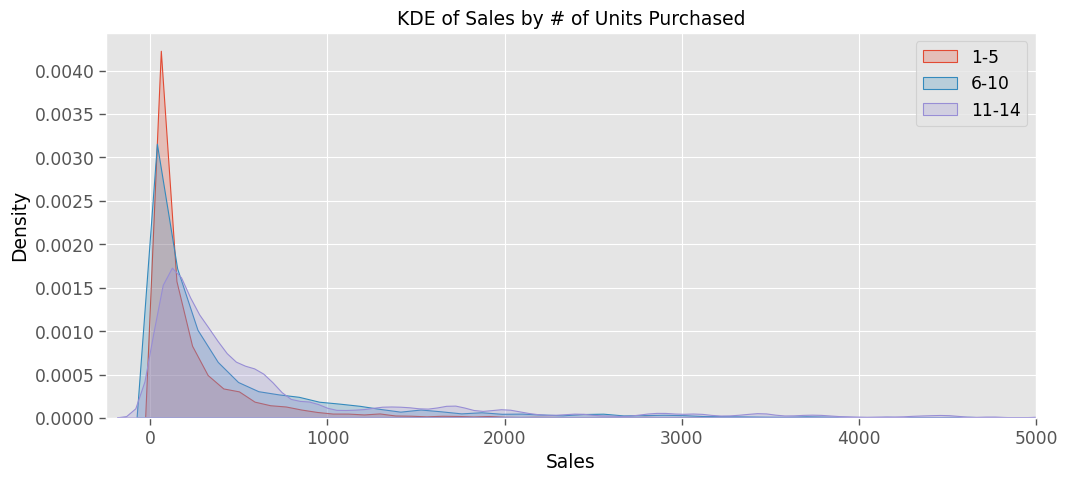

In [65]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Sales'], label='1-5', fill=True,bw_adjust=0.2)
sns.kdeplot(six_ten['Sales'], label='6-10', fill=True,bw_adjust=0.2)
sns.kdeplot(eleven_fourteen['Sales'], label='11-14', fill=True,bw_adjust=0.2)

ax.set_xlim(-250,5000)
plt.title('KDE of Sales by # of Units Purchased')
plt.legend()
plt.show()

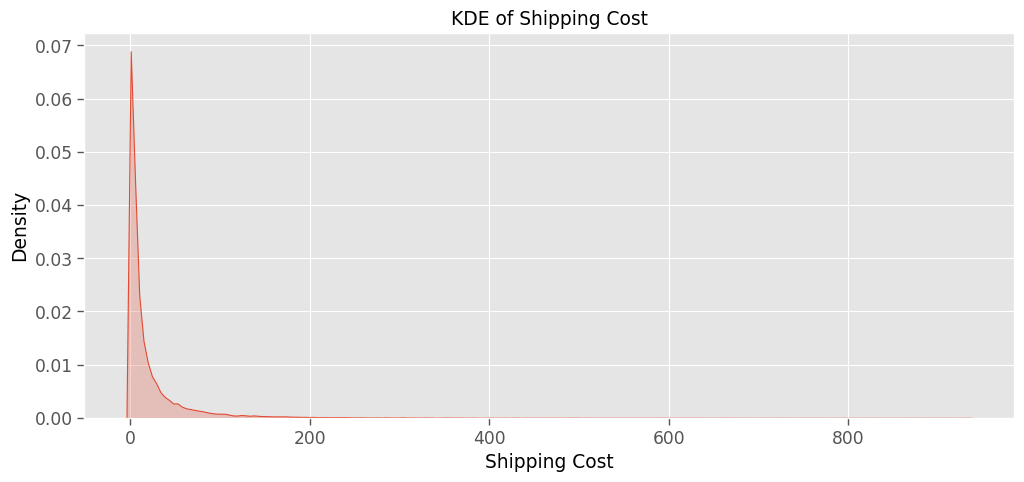

In [66]:
fig,ax = plt.subplots()

sns.kdeplot(df['Shipping Cost'], fill=True, bw_adjust=0.2)

plt.title('KDE of Shipping Cost')
plt.show()

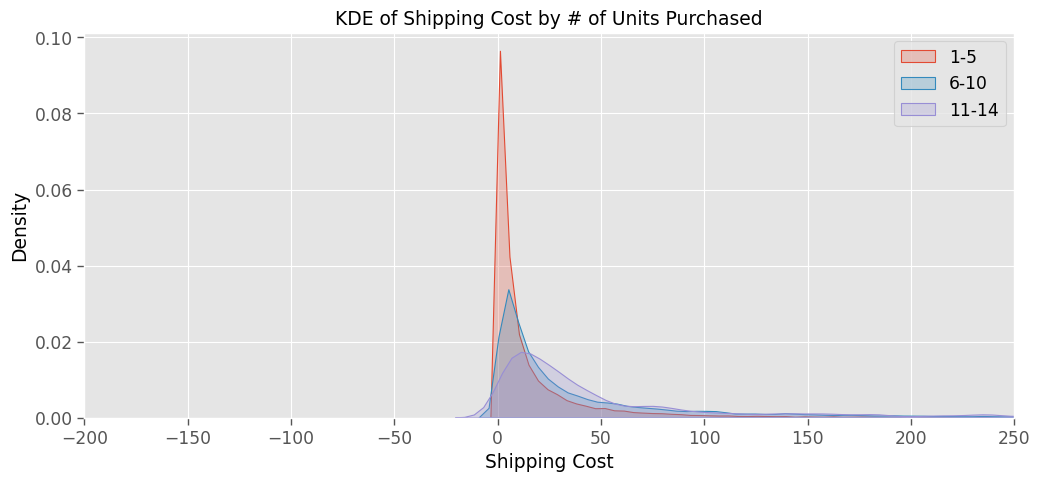

In [67]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Shipping Cost'], label='1-5', fill=True,bw_adjust=0.2)
sns.kdeplot(six_ten['Shipping Cost'], label='6-10', fill=True,bw_adjust=0.2)
sns.kdeplot(eleven_fourteen['Shipping Cost'], label='11-14', fill=True,bw_adjust=0.2)

ax.set_xlim(-200,250)
plt.title('KDE of Shipping Cost by # of Units Purchased')
plt.legend()
plt.show()

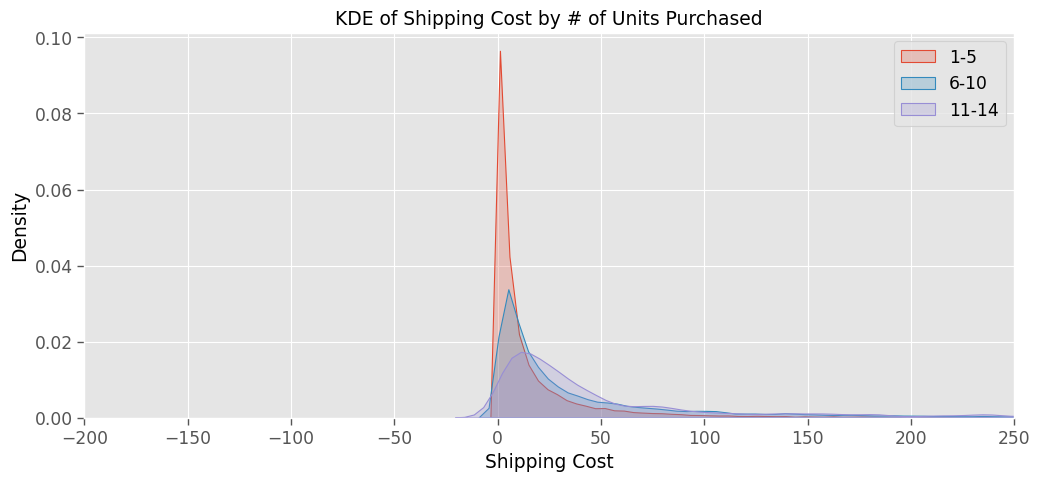

In [68]:
fig,ax = plt.subplots()

sns.kdeplot(one_five['Shipping Cost'], label='1-5', fill=True,bw_adjust=0.2)
sns.kdeplot(six_ten['Shipping Cost'], label='6-10', fill=True,bw_adjust=0.2)
sns.kdeplot(eleven_fourteen['Shipping Cost'], label='11-14', fill=True,bw_adjust=0.2)

ax.set_xlim(-200,250)
plt.title('KDE of Shipping Cost by # of Units Purchased')
plt.legend()
plt.show()

## Predict profit with simple linear regression ##

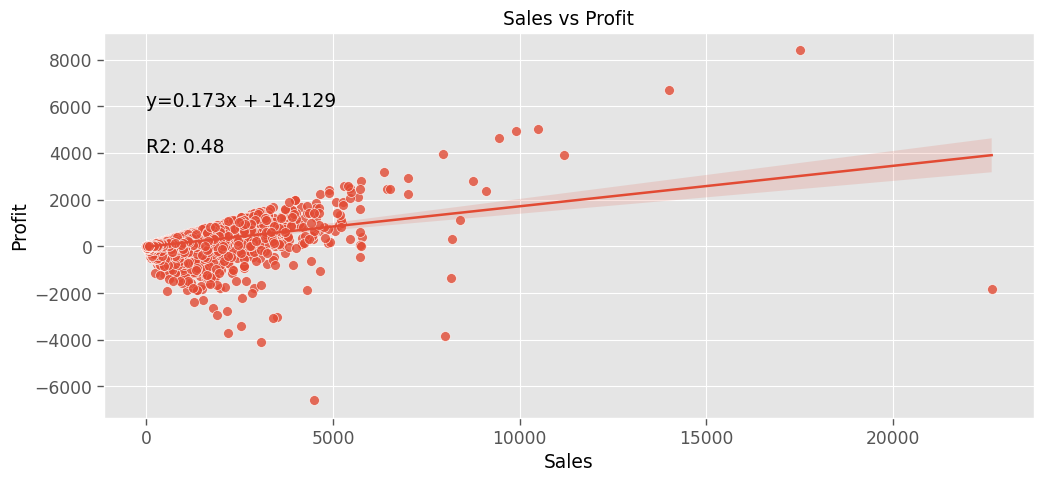

In [69]:
#sales vs profit
fig, ax = plt.subplots()
sns.set_context('paper', font_scale=1.4)
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws=scatter_kw)

slope, intercept, r, p, sterr = stats.linregress(x=df['Sales'],
                                                      y=df['Profit'])

r = round(r,2)
ax.text(0,4000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,6000, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit')
plt.show()

# Taking a closer look at the relationship between sales, profit, and discounts #

## analyzing by brackets of discount percentage ##

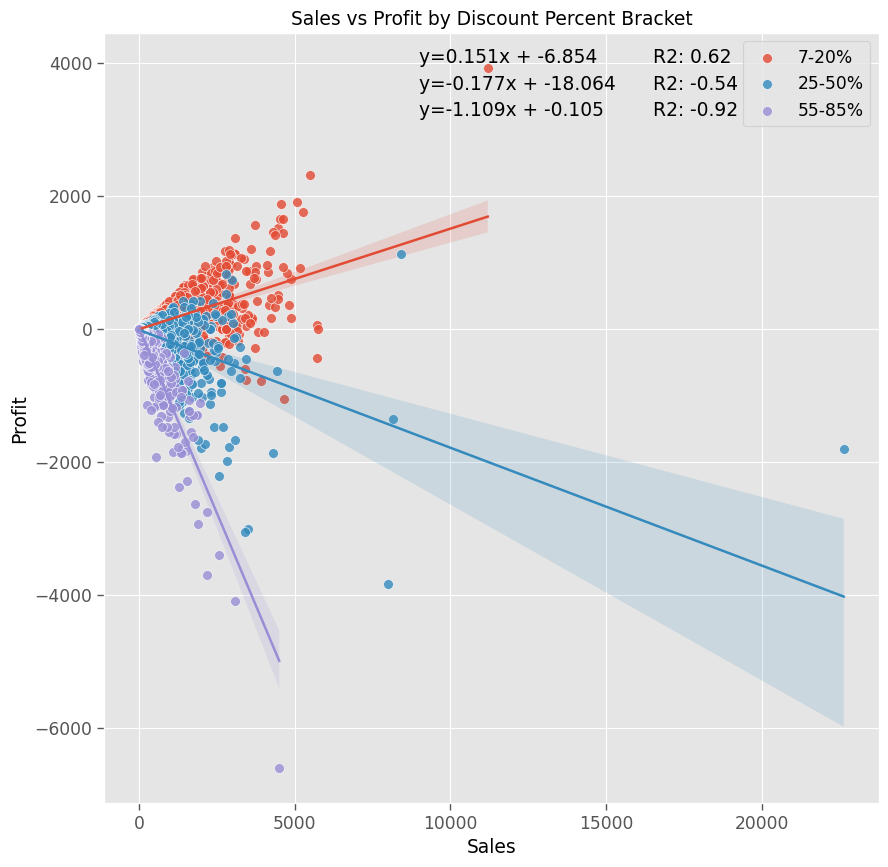

In [70]:
fig, ax = plt.subplots(figsize=(10,10))

sns.regplot(data=low_disc,x='Sales',y='Profit',scatter_kws=scatter_kw,
           label='7-20%')
slope, intercept, r, p, sterr = stats.linregress(x=low_disc['Sales'],
                                                      y=low_disc['Profit'])
r = round(r,2)
ax.text(16500,4000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(9000,4000, f'y={slope}x + {intercept}')


sns.regplot(data=med_disc,x='Sales',y='Profit',scatter_kws=scatter_kw,
           label='25-50%')
slope, intercept, r, p, sterr = stats.linregress(x=med_disc['Sales'],
                                                      y=med_disc['Profit'])
r = round(r,2)
ax.text(16500,3600,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(9000,3600, f'y={slope}x + {intercept}')

sns.regplot(data=high_disc,x='Sales',y='Profit',scatter_kws=scatter_kw,
           label='55-85%')
slope, intercept, r, p, sterr = stats.linregress(x=high_disc['Sales'],
                                                      y=high_disc['Profit'])
r = round(r,2)
ax.text(16500,3200,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(9000,3200, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit by Discount Percent Bracket')
plt.legend()

plt.show()

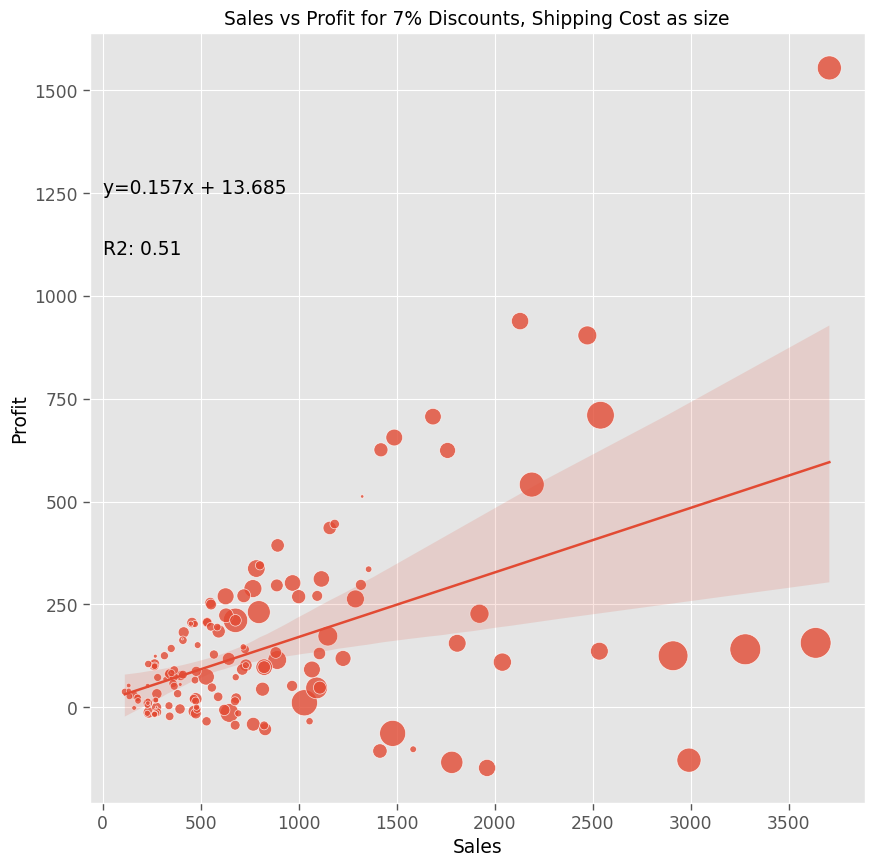

In [71]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

seven_percent = discount_df.loc[discount_df['Discount'] == 7]

sns.regplot(data=seven_percent, x='Sales',y='Profit',
            scatter_kws={'s':seven_percent['Shipping Cost'], 'linewidth': 0.5, 'edgecolor':'w'})

slope, intercept, r, p, sterr = stats.linregress(x=seven_percent['Sales'],
                                                      y=seven_percent['Profit'])

r = round(r,2)
ax.text(0,1100,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,1250, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit for 7% Discounts, Shipping Cost as size')

plt.show()


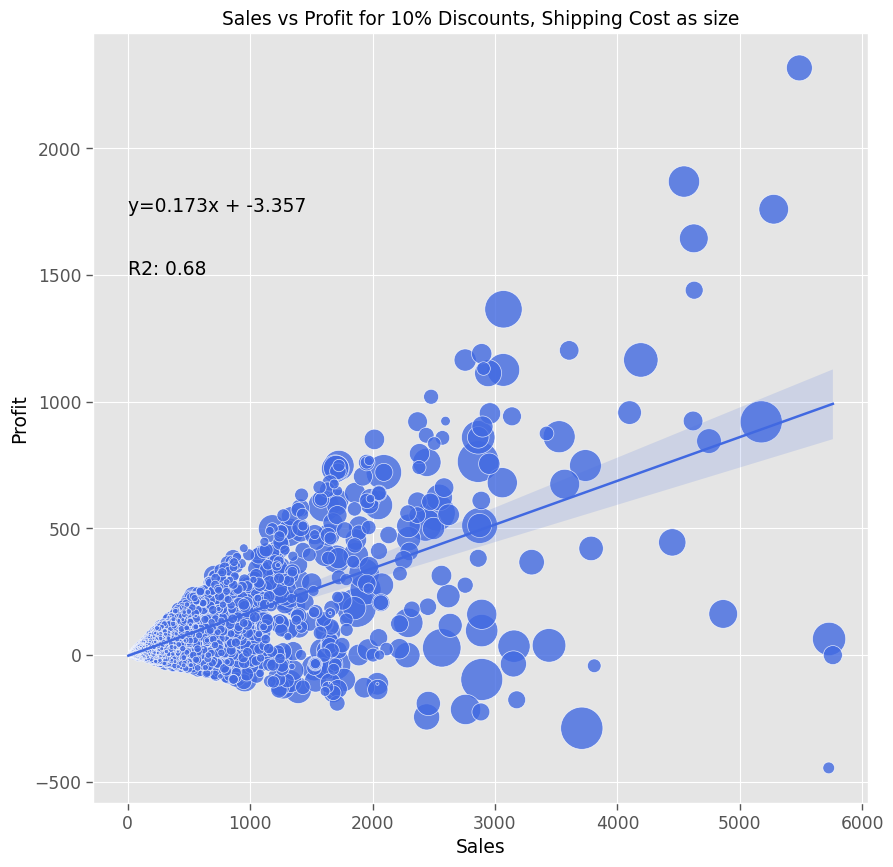

In [72]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

ten_percent = discount_df.loc[discount_df['Discount'] == 10]

sns.regplot(data=ten_percent, x='Sales',y='Profit',
            scatter_kws={'s':ten_percent['Shipping Cost'], 'linewidth': 0.5, 'edgecolor':'w'},
           color='royalblue')

slope, intercept, r, p, sterr = stats.linregress(x=ten_percent['Sales'],
                                                      y=ten_percent['Profit'])

r = round(r,2)
ax.text(0,1500,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,1750, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit for 10% Discounts, Shipping Cost as size')

plt.show()

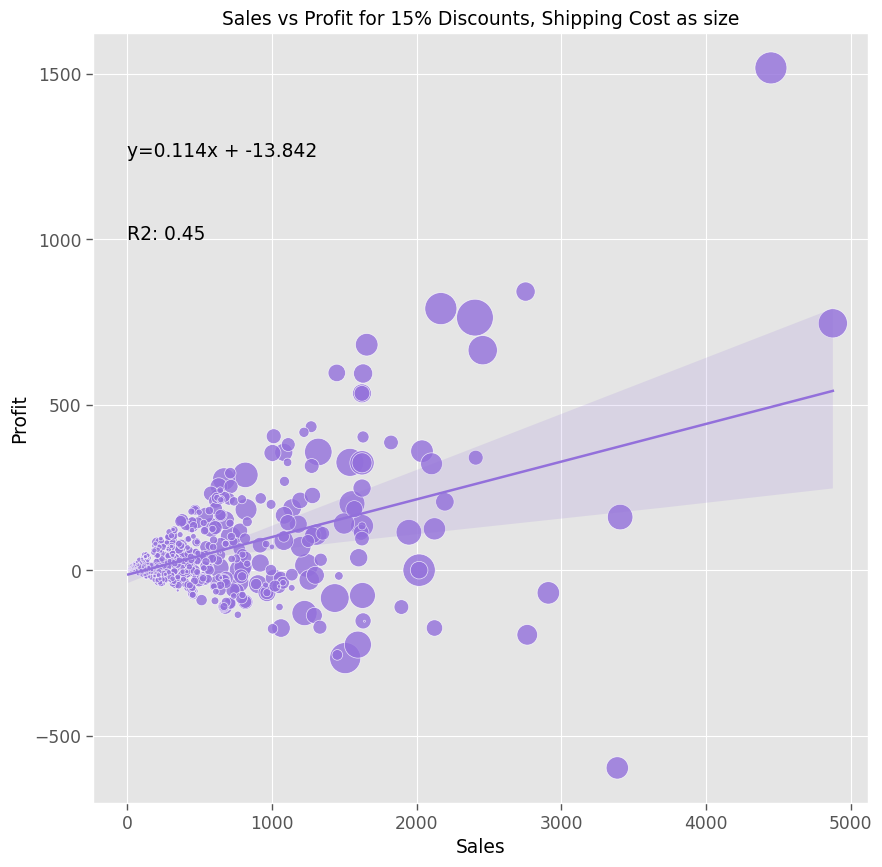

In [73]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

fifteen_percent = discount_df.loc[discount_df['Discount'] == 15]

sns.regplot(data=fifteen_percent, x='Sales',y='Profit', 
            scatter_kws={'s':fifteen_percent['Shipping Cost'], 'linewidth': 0.5, 'edgecolor':'w'},
           color='mediumpurple')

slope, intercept, r, p, sterr = stats.linregress(x=fifteen_percent['Sales'],
                                                      y=fifteen_percent['Profit'])

r = round(r,2)
ax.text(0,1000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,1250, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit for 15% Discounts, Shipping Cost as size')

plt.show()

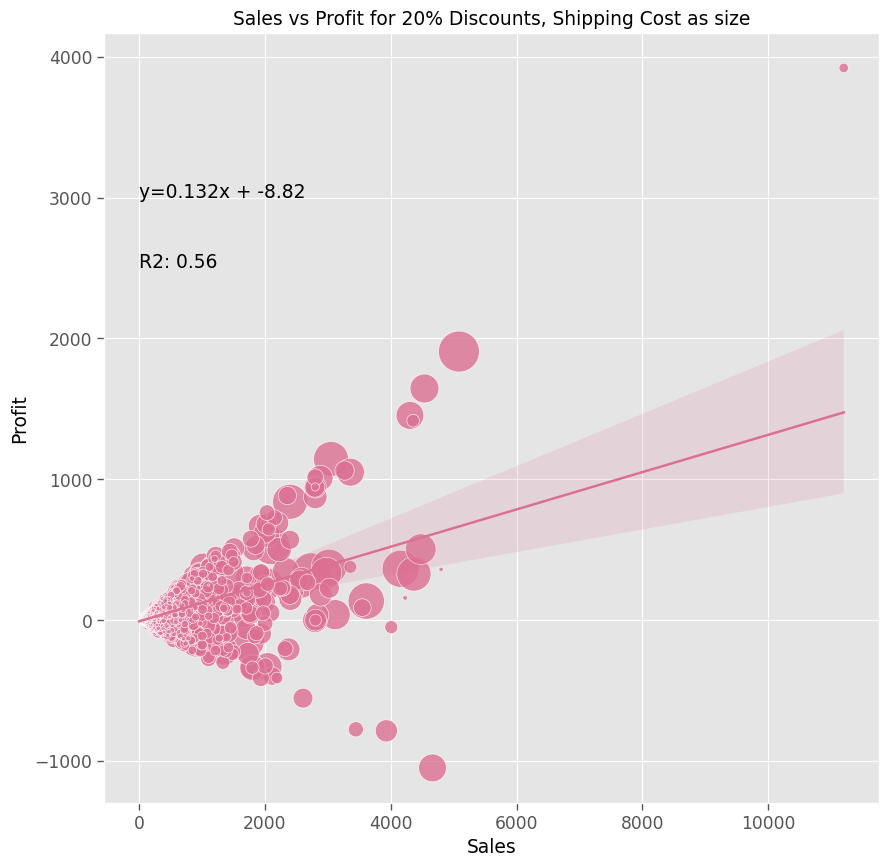

In [74]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))


twenty_percent = discount_df.loc[discount_df['Discount'] == 20]

sns.regplot(data=twenty_percent, x='Sales',y='Profit', color='palevioletred',
            scatter_kws={'s':twenty_percent['Shipping Cost'], 'linewidth': 0.5, 'edgecolor':'w'})

slope, intercept, r, p, sterr = stats.linregress(x=twenty_percent['Sales'],
                                                      y=twenty_percent['Profit'])

r = round(r,2)
ax.text(0,2500,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,3000, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit for 20% Discounts, Shipping Cost as size')

plt.show()

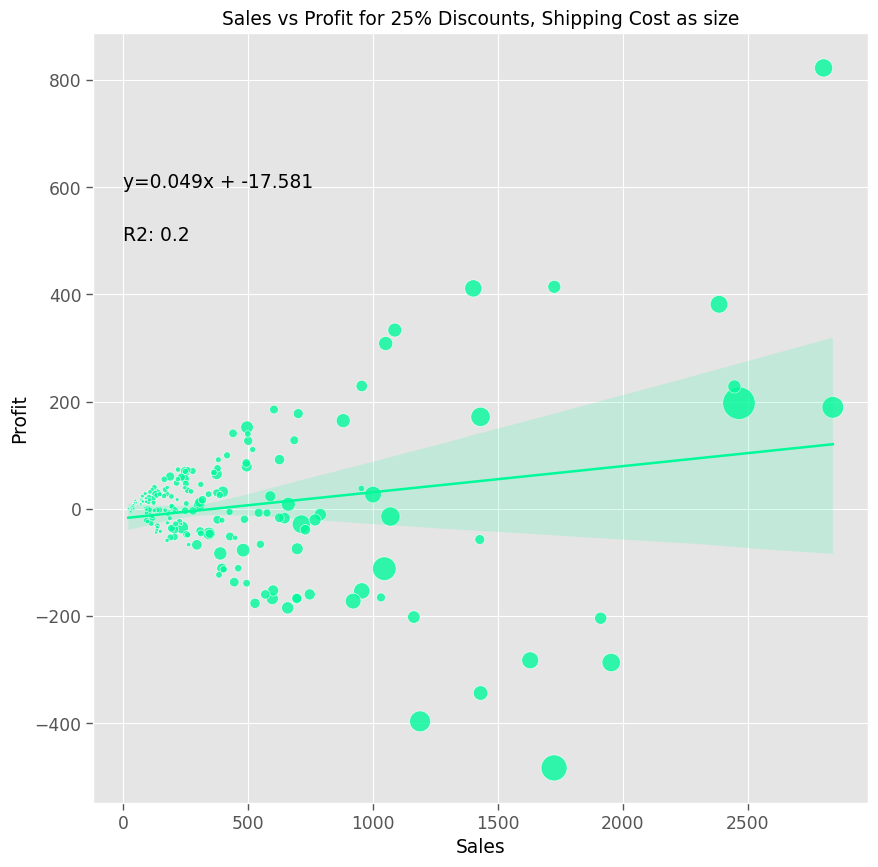

In [75]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))


twentyfive_percent = discount_df.loc[discount_df['Discount'] == 25]

sns.regplot(data=twentyfive_percent, x='Sales',y='Profit', color='mediumspringgreen',
            scatter_kws={'s':twentyfive_percent['Shipping Cost'], 'linewidth': 0.5, 'edgecolor':'w'})

slope, intercept, r, p, sterr = stats.linregress(x=twentyfive_percent['Sales'],
                                                      y=twentyfive_percent['Profit'])

r = round(r,2)
ax.text(0,500,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,600, f'y={slope}x + {intercept}')

plt.title('Sales vs Profit for 25% Discounts, Shipping Cost as size')

plt.show()

## Shipping cost vs profit and sales ##

Text(0.5, 1.0, 'Shipping Cost vs Sales, Quantity ordered as size')

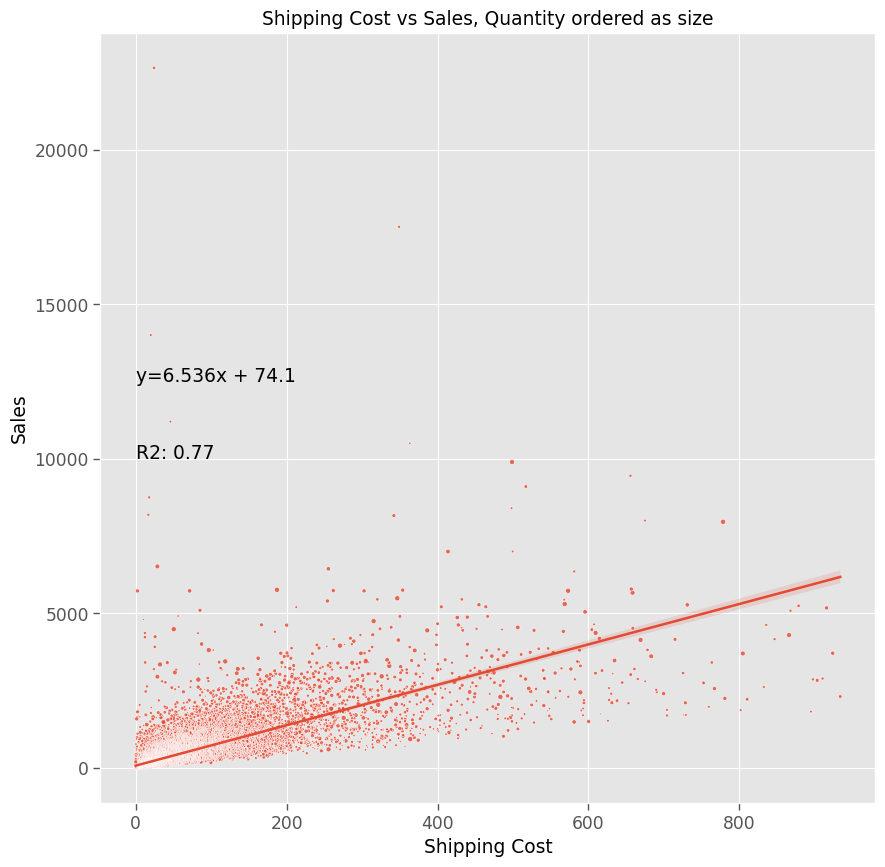

In [76]:
#shipping cost vs sales
fig, ax = plt.subplots(figsize=(10,10))

sns.set_context('paper', font_scale=1.4)
sns.regplot(x='Shipping Cost', y='Sales', data=df
           ,scatter_kws={'s':df['Quantity'], 'linewidth': 0.5, 'edgecolor':'w'})

slope, intercept, r, p, sterr = stats.linregress(x=df['Shipping Cost'],
                                                      y=df['Sales'])

r = round(r,2)
ax.text(0,10000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,12500, f'y={slope}x + {intercept}')

plt.title('Shipping Cost vs Sales, Quantity ordered as size')

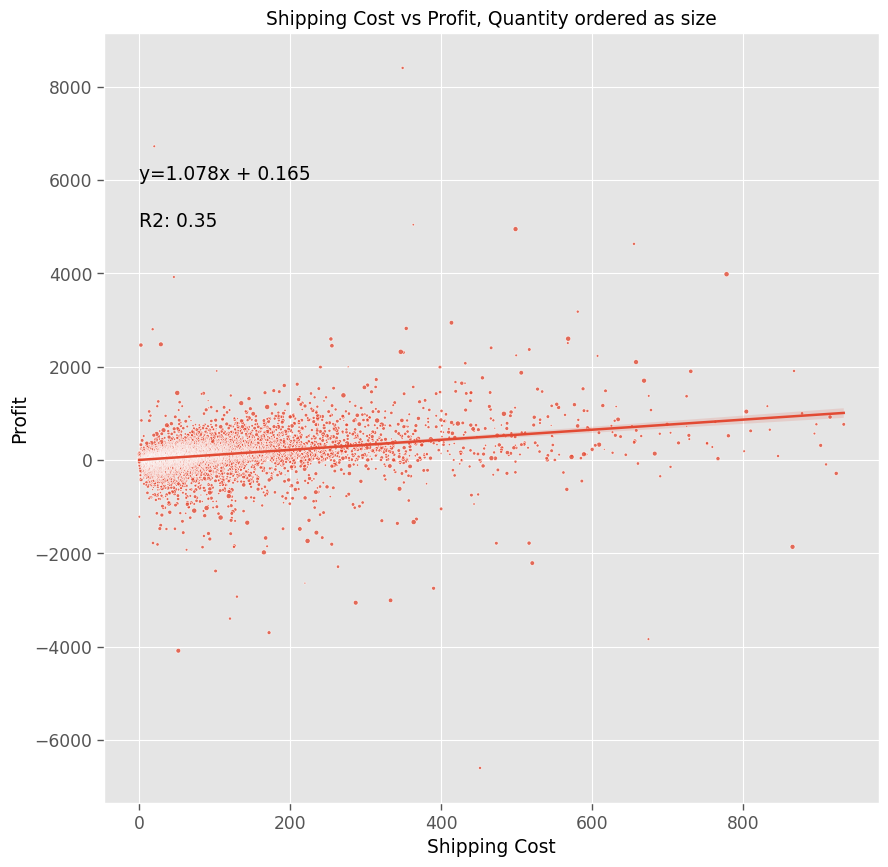

In [77]:
#shipping cost vs sales
fig, ax = plt.subplots(figsize=(10,10))

sns.set_context('paper', font_scale=1.4)
g = sns.regplot(x='Shipping Cost', y='Profit', data=df
           ,scatter_kws={'s':df['Quantity'], 'linewidth': 0.5, 'edgecolor':'w'})

slope, intercept, r, p, sterr = stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                      y=g.get_lines()[0].get_ydata())

r, p = stats.pearsonr(df['Shipping Cost'], df['Profit'])
r = round(r,2)
ax.text(0,5000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,6000, f'y={slope}x + {intercept}')

plt.title('Shipping Cost vs Profit, Quantity ordered as size')
plt.show()

## by quantity ##

## 

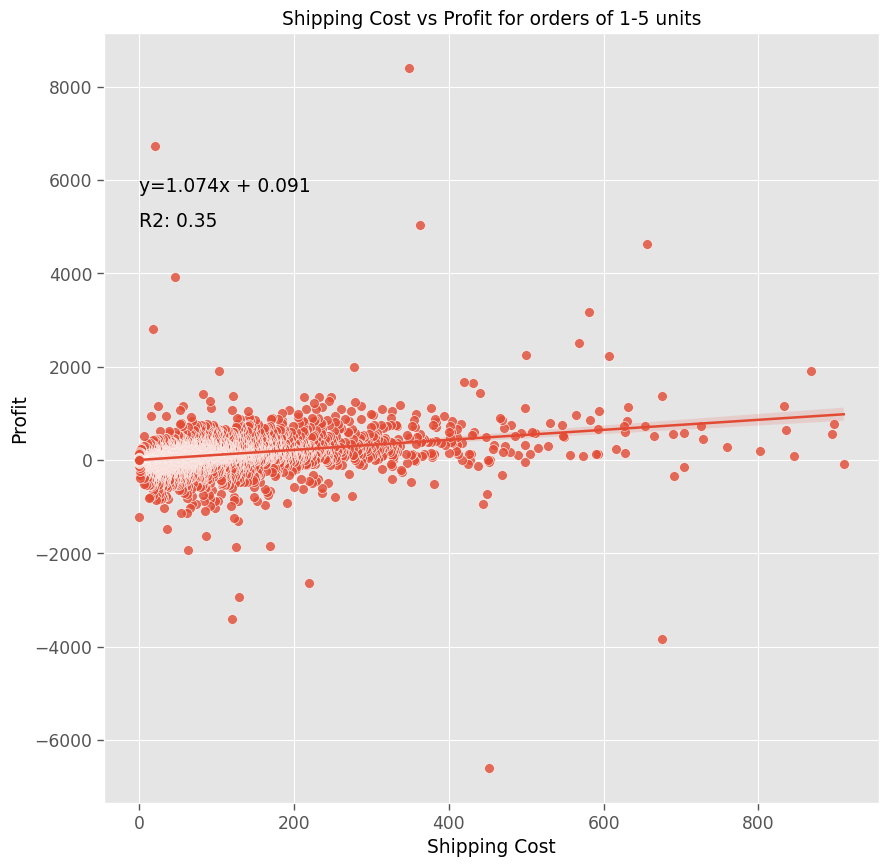

In [78]:
#at what range of units purchased is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

g = sns.regplot(data=one_five, x='Shipping Cost', y='Profit',
           scatter_kws=scatter_kw) #1-5

slope, intercept, r, p, sterr = stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                      y=g.get_lines()[0].get_ydata())

r, p = stats.pearsonr(one_five['Shipping Cost'], one_five['Profit'])
r = round(r,2)
ax.text(0,5000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,5750, f'y={slope}x + {intercept}')

plt.title('Shipping Cost vs Profit for orders of 1-5 units')
plt.show()

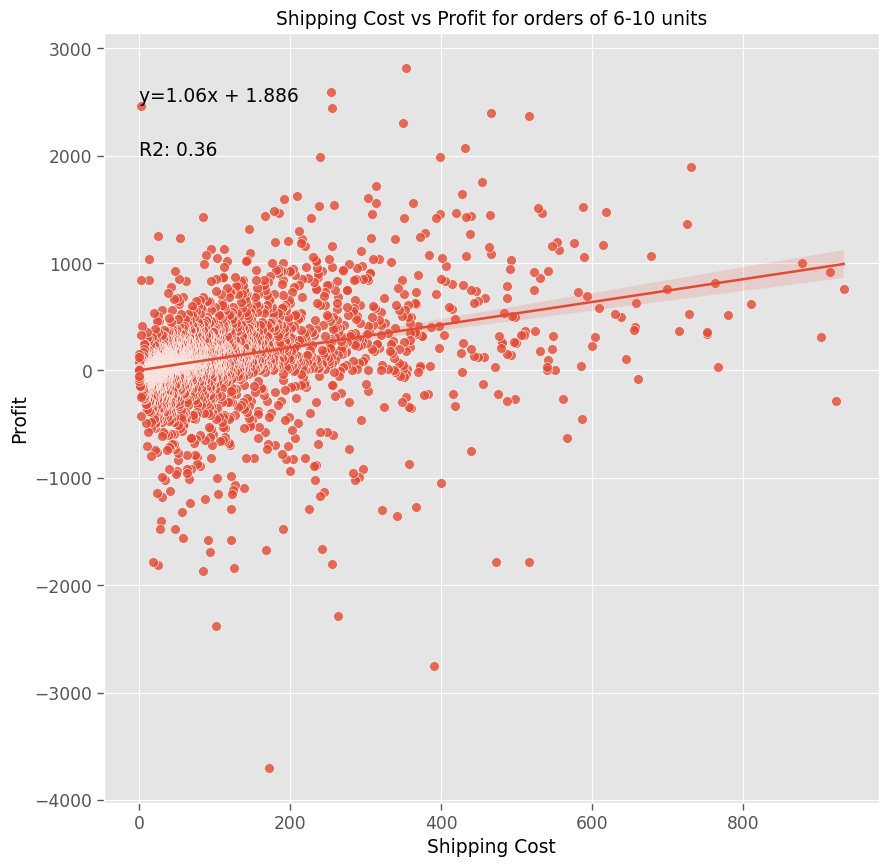

In [79]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

g = sns.regplot(data=six_ten, x='Shipping Cost', y='Profit',
           scatter_kws=scatter_kw) #6-10


slope, intercept, r, p, sterr = stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                      y=g.get_lines()[0].get_ydata())

r, p = stats.pearsonr(six_ten['Shipping Cost'], six_ten['Profit'])
r = round(r,2)
ax.text(0,2000,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,2500, f'y={slope}x + {intercept}')

plt.title('Shipping Cost vs Profit for orders of 6-10 units')
plt.show()

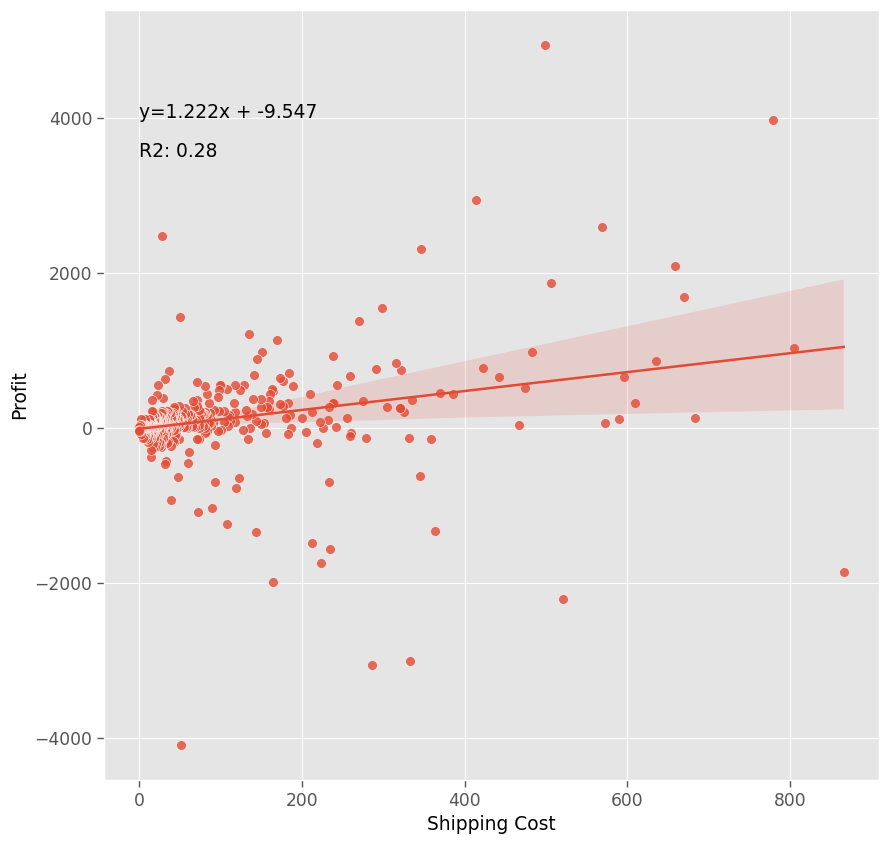

In [80]:
#at what percentage of discount is the threshold for still making a profit?
fig, ax = plt.subplots(figsize=(10,10))

g = sns.regplot(data=eleven_fourteen, x='Shipping Cost', y='Profit',
           scatter_kws=scatter_kw) #11-14

slope, intercept, r, p, sterr = stats.linregress(x=g.get_lines()[0].get_xdata(),
                                                      y=g.get_lines()[0].get_ydata())

r, p = stats.pearsonr(eleven_fourteen['Shipping Cost'], eleven_fourteen['Profit'])
r = round(r,2)
ax.text(0,3500,f'R2: {r}')
slope = round(slope,3)
intercept = round(intercept,3)
ax.text(0,4000, f'y={slope}x + {intercept}')

plt.show()

# Using t-tests to determine how significant is discount on: <br> &emsp; sales <br> &emsp; profit #

## transforming the distribution

Text(0.5, 1.0, 'Sales Distribution')

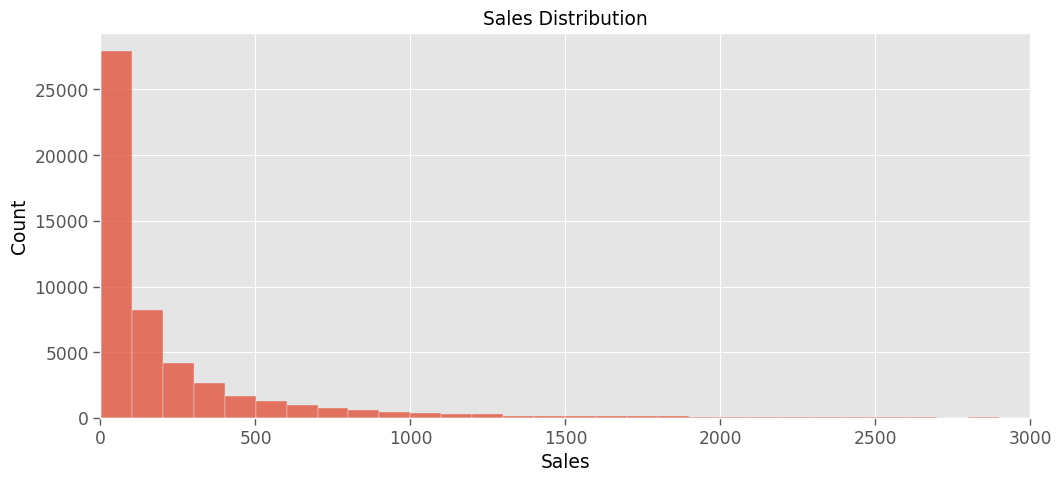

In [81]:
#distribution is heavily skewed to the right
n = target_numeric['Sales'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Sales'])-min(target_numeric['Sales']))/math.sqrt(n)

sales_dist = sns.histplot(data=target_numeric['Sales'], bins=bins, binwidth=bin_width)

sales_dist.set_xlim(0, 3000)
plt.title('Sales Distribution')

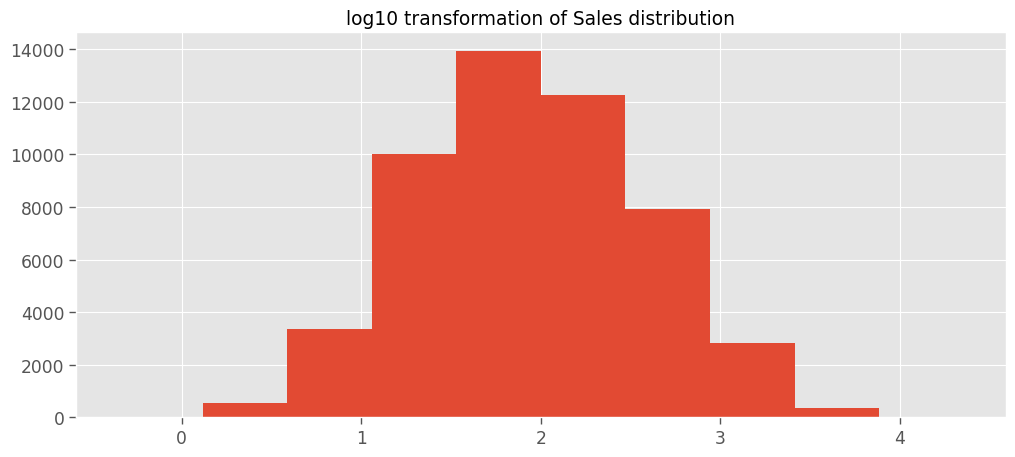

In [82]:
log10_sales = np.log10(df['Sales'])

log10_sales.hist()
plt.title('log10 transformation of Sales distribution')
plt.show()

<Axes: >

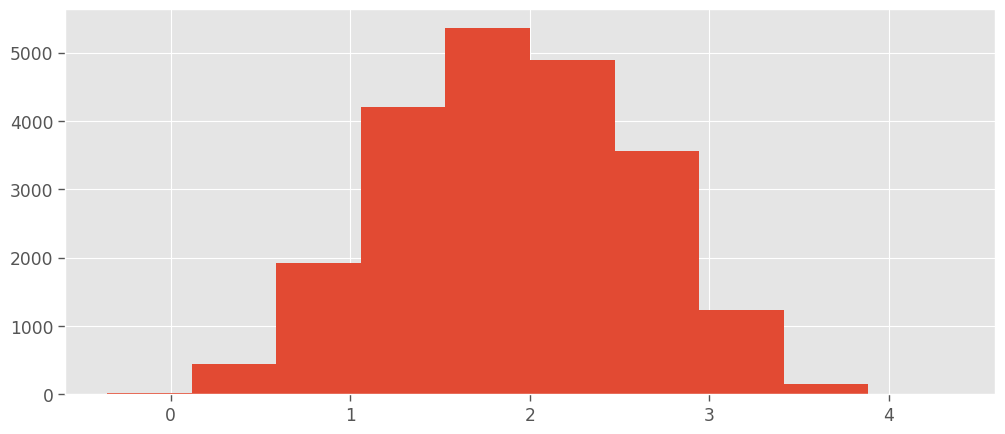

In [83]:
log10_disc_sales = np.log10(discount_df['Sales'])

log10_disc_sales.hist()

<Axes: >

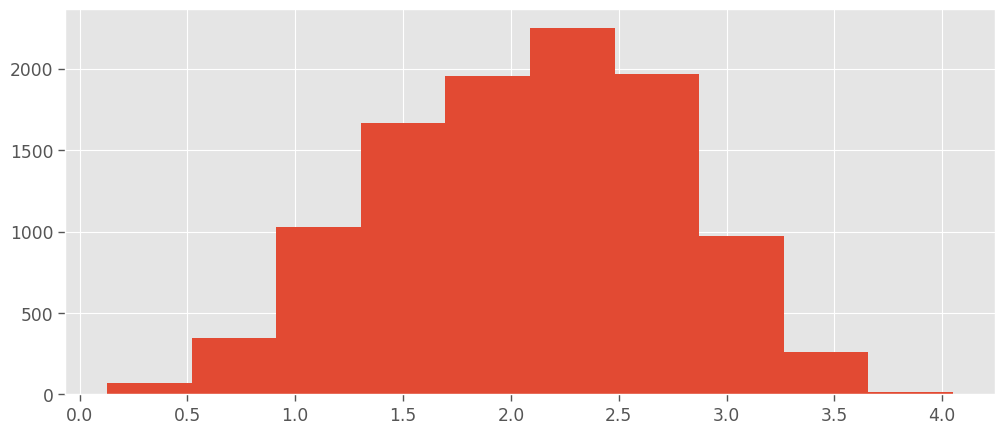

In [84]:
log10_lowdisc_sales = np.log10(low_disc['Sales'])

log10_lowdisc_sales.hist()

<Axes: >

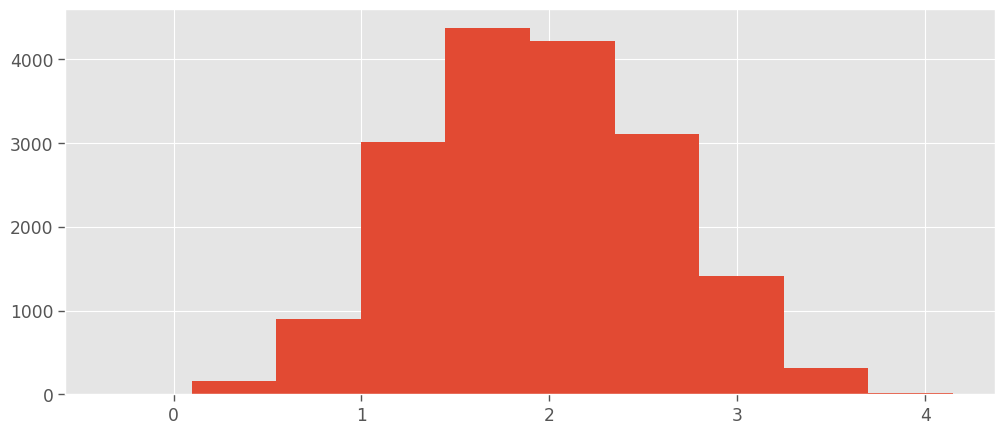

In [85]:
#2014 sales
log10_2014_sales = np.log10(df_2014['Sales'])

log10_2014_sales.hist()

<Axes: >

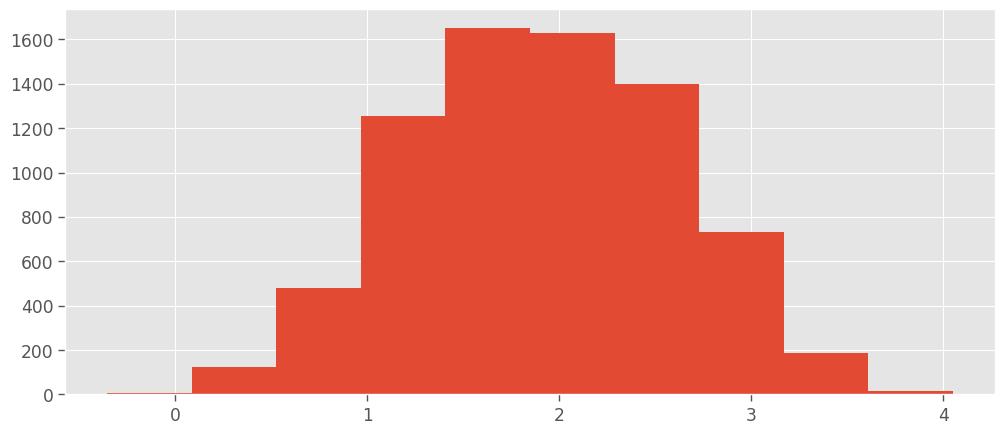

In [86]:
disc_sales_2014 = discount_df.loc[discount_df['Year'] == '2014']

log10_disc_sales_2014 = np.log10(disc_sales_2014['Sales'])
log10_disc_sales_2014.hist()

<Axes: >

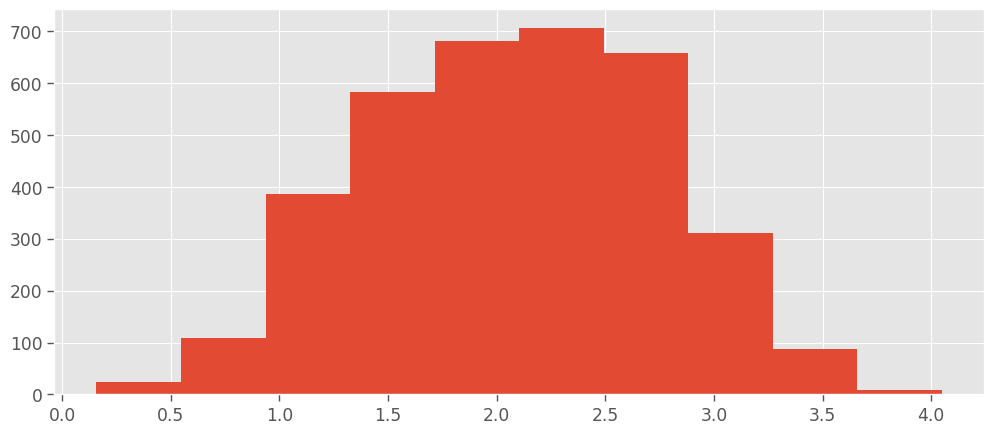

In [87]:
#2014 7-20% discount sales
lowdisc_sales_2014 = low_disc.loc[low_disc['Year'] == '2014']

log10_lowdisc_sales_2014 = np.log10(lowdisc_sales_2014['Sales'])
log10_lowdisc_sales_2014.hist()

### Null hypothesis: There is no relationship between discounts and sales ###

In [88]:
#mean of sales vs mean of discounted sales
sales_pop_mean = log10_sales.mean()
sales_2014_mean = log10_2014_sales.mean() #2014, the year of the highest sales
sales_disc_mean = log10_disc_sales.mean() #all discounted orders
sales_lowdisc_mean = log10_lowdisc_sales.mean() #7-20% discounted orders
sales_disc_2014_mean = log10_disc_sales_2014.mean() #discounted in 2014
sales_lowdisc2014_mean = log10_lowdisc_sales_2014.mean() #7-20% discount orders in 2014

In [89]:
#standard deviations
sales_std = sts.pstdev(log10_sales)
disc_std = sts.stdev(log10_disc_sales)
lowdisc_std = sts.stdev(log10_lowdisc_sales)
sales_std_2014 = sts.stdev(log10_2014_sales)
disc_std_2014 = sts.stdev(log10_disc_sales_2014)
lowdisc_std_2014 = sts.stdev(log10_lowdisc_sales_2014)

#standard error of the mean
sales_sem = stats.sem(log10_sales)
disc_sem = stats.sem(log10_disc_sales)
lowdisc_sem = stats.sem(log10_lowdisc_sales)
sales_sem_2014 = stats.sem(log10_2014_sales)
disc_sem_2014 = stats.sem(log10_disc_sales_2014)
lowdisc_sem_2014 = stats.sem(log10_lowdisc_sales_2014)

In [90]:
#discounted sales t-test
pop_sales = stats.ttest_1samp(a = log10_disc_sales, popmean = sales_pop_mean)
sales_interval = stats.t.interval(confidence=0.95, df=len(log10_disc_sales)-1, loc=sales_disc_mean, scale=disc_sem)

In [91]:
#7-20% discounted sales t-test
pop_sales2 = stats.ttest_1samp(a = log10_lowdisc_sales, popmean = sales_pop_mean)
sales_interval_low = stats.t.interval(confidence=0.95, df=len(log10_lowdisc_sales)-1, 
                                      loc=sales_lowdisc_mean, scale=lowdisc_sem)

In [92]:
#2014 discounted sales t-test
sales_2014 = stats.ttest_1samp(a = log10_disc_sales_2014, popmean = sales_2014_mean)
sales_2014_interval= stats.t.interval(confidence=0.95, df=len(log10_disc_sales_2014)-1, \
                                      loc=sales_disc_2014_mean, scale=disc_sem_2014)

In [93]:
#2014 7-20% discounted sales t-test
sales_2014_2 = stats.ttest_1samp(a = log10_lowdisc_sales_2014, popmean = sales_2014_mean)
sales_2014_interval_low = stats.t.interval(confidence=0.95, df=len(log10_lowdisc_sales_2014)-1, \
                                          loc=sales_lowdisc2014_mean, scale=lowdisc_sem_2014)

In [94]:
sales_group = pd.DataFrame()
group = ['Population Sales', 'Discounted Sales', '7-20% Discounted Sales','2014 Sales',
         '2014 Discounted Sales','2014 7-20% Discounted Sales']
n = [len(log10_sales), len(log10_disc_sales), len(log10_lowdisc_sales),
     len(log10_2014_sales), len(log10_disc_sales_2014), len(log10_lowdisc_sales_2014)]
means = [sales_pop_mean, sales_disc_mean,sales_lowdisc_mean, 
         sales_2014_mean, sales_disc_2014_mean, sales_lowdisc2014_mean]
std = [sales_std, disc_std, lowdisc_std, 
       sales_std_2014, disc_std_2014, lowdisc_std_2014]
sem = [sales_sem, disc_sem, lowdisc_sem, sales_sem_2014, 
       disc_sem_2014, lowdisc_sem_2014]

In [95]:
sales_group['Group'] = group
sales_group['N'] = n
sales_group['Mean'] = means
sales_group['Std. Dev'] = std
sales_group['Std. Error Mean'] = sem

In [96]:
sales_group

Group      N      Mean  Std. Dev  Std. Error Mean
0             Population Sales  51290  1.947202  0.633130         0.002796
1             Discounted Sales  21820  1.913149  0.678615         0.004594
2       7-20% Discounted Sales  10533  2.085832  0.661028         0.006441
3                   2014 Sales  17531  1.945043  0.633927         0.004788
4        2014 Discounted Sales   7477  1.909442  0.675845         0.007816
5  2014 7-20% Discounted Sales   3559  2.080426  0.659516         0.011055

In [97]:
sales_ttest = pd.DataFrame()
group = ['Discounted Sales', '7-20% Discounted Sales' ,'2014 Discounted Sales', '2014 7-20% Discounted Sales']
t = [pop_sales[0], pop_sales2[0], sales_2014[0], sales_2014_2[0]]
p = [pop_sales[1], pop_sales2[1],sales_2014[1], sales_2014_2[1]]
deg_freedom = [len(log10_disc_sales)-1, len(log10_lowdisc_sales)-1,
               len(log10_disc_sales_2014)-1, len(log10_lowdisc_sales_2014)]
mean_diff = [sales_pop_mean-sales_disc_mean, sales_pop_mean-sales_lowdisc_mean,
             sales_2014_mean-sales_disc_2014_mean, sales_2014_mean-sales_lowdisc2014_mean]
lower = [sales_interval[0], sales_interval_low[0], 
         sales_2014_interval[0], sales_2014_interval_low[0]]
upper = [sales_interval[1], sales_interval_low[1], 
         sales_2014_interval[1], sales_2014_interval_low[1]]

In [98]:
sales_ttest['Group'] = group
sales_ttest['t'] = t
sales_ttest['p'] = p
sales_ttest['df'] = deg_freedom
sales_ttest['Mean Difference'] = mean_diff
sales_ttest['Lower'] = lower
sales_ttest['Upper'] = upper

In [99]:
sales_ttest

Group          t              p     df  \
0             Discounted Sales  -7.412323   1.286267e-13  21819   
1       7-20% Discounted Sales  21.523607  1.349615e-100  10532   
2        2014 Discounted Sales  -4.554913   5.323800e-06   7476   
3  2014 7-20% Discounted Sales  12.246260   8.353956e-34   3559   

   Mean Difference     Lower     Upper  
0         0.034053  1.904145  1.922154  
1        -0.138630  2.073207  2.098458  
2         0.035601  1.894120  1.924763  
3        -0.135383  2.058751  2.102101

### The t-statistic lies outside of the lower and upper quantiles. The p-value is also less than the alpha-value corresponding to the specified 95% confidence interval. The null hypothesis is rejected. There is a statistically significant difference between discounted sales and population sales. ###

# What is the relationship between discounts and profit? #

### Null hypothesis: The profit mean is not statistically different from the profit mean of discounted sales ###

Text(0.5, 1.0, 'Profit Distribution')

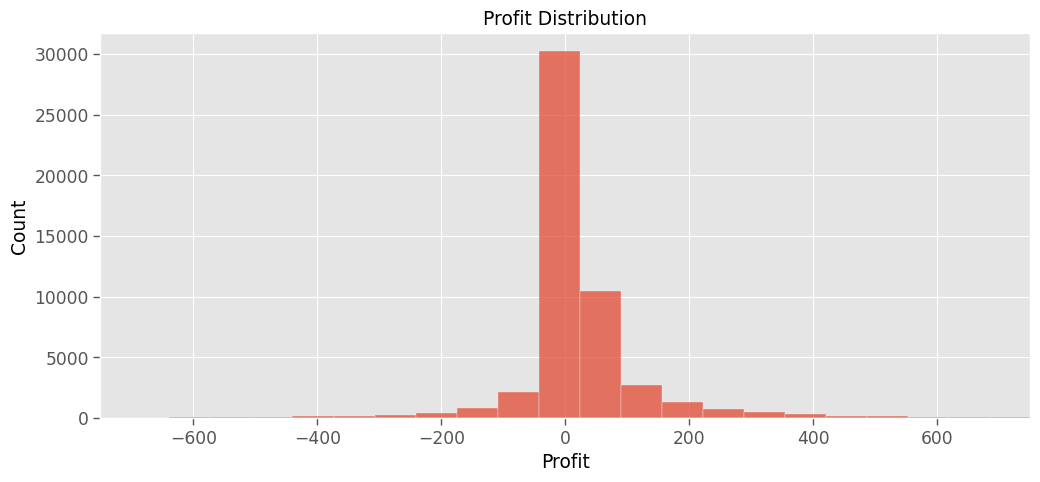

In [100]:
#distribution approximately normally distributed but seems to contain many outliers
n = target_numeric['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(target_numeric['Profit'])-min(target_numeric['Profit']))/math.sqrt(n)

prof_dist = sns.histplot(data=target_numeric['Profit'], bins=bins, binwidth=bin_width)
prof_dist.set_xlim(-750,750)
plt.title('Profit Distribution')

Text(0.5, 1.0, 'Profit Distribution for 7-20% Discounted Orders')

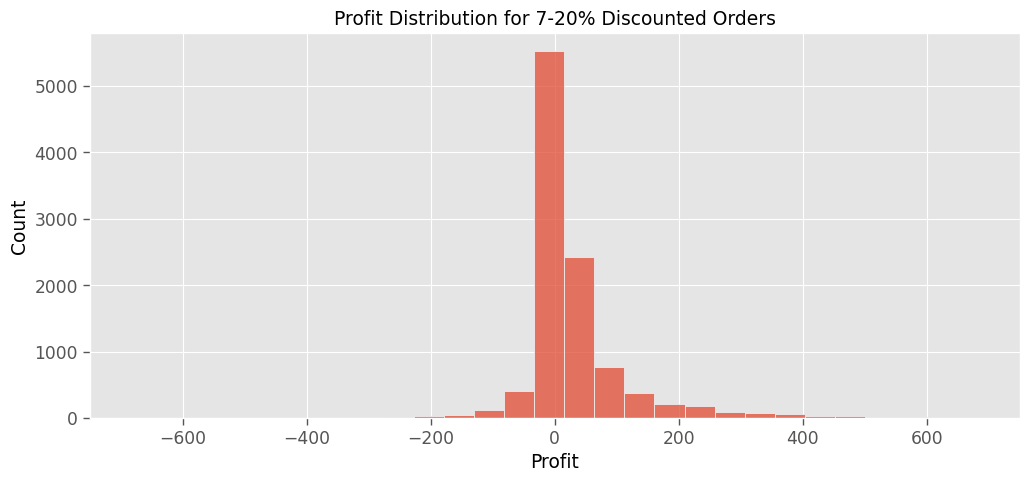

In [101]:
#distribution approximately normally distributed but seems to contain many outliers
n = low_disc['Profit'].count()
bins = int(round(math.sqrt(n)))
bin_width = (max(low_disc['Profit'])-min(low_disc['Profit']))/math.sqrt(n)

prof_dist = sns.histplot(data=low_disc['Profit'], bins=bins, binwidth=bin_width)
prof_dist.set_xlim(-750,750)
plt.title('Profit Distribution for 7-20% Discounted Orders')

In [102]:
#profit distribution is already approximately normally distributed
profit_pop_mean = df['Profit'].mean()
profit_disc_mean = discount_df['Profit'].mean()
profit_lowdisc_mean = low_disc['Profit'].mean()
profit_2014_mean = df_2014['Profit'].mean()
profit_disc_2014_mean = disc_sales_2014['Profit'].mean()
profit_lowdisc_2014_mean = lowdisc_sales_2014['Profit'].mean()

In [103]:
#standard deviation
profit_std = sts.pstdev(df['Profit'])
profit_disc_std = sts.stdev(discount_df['Profit'])
profit_lowdisc_std = sts.stdev(low_disc['Profit'])
profit_std_2014 = sts.stdev(df_2014['Profit'])
profit_disc_std_2014 = sts.stdev(disc_sales_2014['Profit'])
profit_lowdisc2014_std = sts.stdev(lowdisc_sales_2014['Profit'])

#standard mean error
profit_sem = stats.sem(df['Profit'])
disc_sem = stats.sem(discount_df['Profit'])
profit_lowdisc_sem = stats.sem(low_disc['Profit'])
profit_sem_2014 = stats.sem(df_2014['Profit'])
disc_sem_2014 = stats.sem(disc_sales_2014['Profit'])
lowdisc_sem_2014 = stats.sem(lowdisc_sales_2014['Profit'])

In [104]:
#t-test for all orders
pop_profit = stats.ttest_1samp(a = discount_df['Profit'], popmean = profit_pop_mean)
profit_interval= stats.t.interval(confidence=0.95, df=len(discount_df['Profit'])-1, loc=profit_disc_mean, scale=disc_sem)

In [105]:
#7-20%
pop_profit2 = stats.ttest_1samp(a = low_disc['Profit'], popmean = profit_pop_mean)
profit_interval_low = stats.t.interval(confidence=0.95, df=len(low_disc['Profit'])-1, 
                                  loc=profit_lowdisc_mean, scale=lowdisc_sem)

In [106]:
#2014
profit_2014 = stats.ttest_1samp(a = disc_sales_2014['Profit'], popmean = profit_2014_mean)
profit_2014_interval = stats.t.interval(confidence=0.95, df=len(disc_sales_2014['Profit'])-1, \
                                        loc=profit_disc_2014_mean, scale=disc_sem_2014)

In [107]:
#2014 7-20%
profit_2014_2 = stats.ttest_1samp(a = lowdisc_sales_2014['Profit'], popmean = profit_2014_mean)
profit_2014_interval_low = stats.t.interval(confidence=0.95, df=len(lowdisc_sales_2014['Profit'])-1, \
                                       loc=profit_lowdisc_2014_mean, scale=lowdisc_sem_2014)

In [108]:
profit_group = pd.DataFrame()
group = ['Population Profit', 'Discounted Profit', '7-20% Discounted Profit', 
         '2014 Profit', '2014 Discounted Profit', '2014 7-20% Discounted Profit']
n = [len(df), len(discount_df), len(df_2014), len(low_disc), 
     len(disc_sales_2014), len(lowdisc_sales_2014)]
means = [profit_pop_mean, profit_disc_mean, profit_lowdisc_mean, 
         profit_2014_mean, profit_disc_2014_mean, profit_lowdisc_2014_mean]
std = [profit_std, disc_std, profit_lowdisc_std, profit_std_2014, 
       disc_std_2014, lowdisc_std_2014]
sem = [profit_sem, disc_sem, profit_lowdisc_sem, profit_sem_2014, 
       disc_sem_2014, lowdisc_sem_2014]

In [109]:
profit_group['Group'] = group
profit_group['N'] = n
profit_group['Mean'] = means
profit_group['Std. Dev'] = std
profit_group['Std. Error Mean'] = sem

In [114]:
profit_ttest = pd.DataFrame()
group = ['Discounted Profit','7-20% Discounted Profit','2014 Discounted Profit','2014 7-20% Discounted Profit']
t = [pop_profit[0], pop_profit2[0], profit_2014[0], profit_2014_2[0]]
p = [pop_profit[1], pop_profit2[1],profit_2014[1], profit_2014_2[1]]
deg_freedom = [len(discount_df)-1, len(low_disc)-1,
               len(disc_sales_2014)-1, len(lowdisc_sales_2014)-1]
mean_diff = [profit_pop_mean-profit_disc_mean, profit_pop_mean-profit_lowdisc_mean, 
             profit_2014_mean-profit_disc_2014_mean, profit_2014_mean-profit_lowdisc_2014_mean]
lower = [profit_interval[0], profit_interval_low[0], 
         profit_2014_interval[0], profit_2014_interval_low[0]]
upper = [profit_interval[1], profit_interval_low[1],
         profit_2014_interval[1], profit_2014_interval_low[1]]

In [115]:
profit_ttest['Group'] = group
profit_ttest['t'] = t
profit_ttest['p'] = p
profit_ttest['df'] = deg_freedom
profit_ttest['Mean Difference'] = mean_diff
profit_ttest['Lower'] = lower
profit_ttest['Upper'] = upper

In [116]:
profit_group

Group      N       Mean    Std. Dev  Std. Error Mean
0             Population Profit  51290  28.610982  174.339272         0.769809
1             Discounted Profit  21820 -16.554288    0.678615         1.213389
2       7-20% Discounted Profit  17531  42.995562  133.938862         1.305060
3                   2014 Profit  10533  28.758540  174.283412         1.316293
4        2014 Discounted Profit   7477 -15.867617    0.675845         2.089064
5  2014 7-20% Discounted Profit   3559  43.587595    0.659516         2.436420

In [117]:
profit_ttest

Group          t              p     df  \
0             Discounted Profit -37.222419  4.478035e-294  21819   
1       7-20% Discounted Profit  11.022157   4.254713e-28  10532   
2        2014 Discounted Profit -21.361794   2.515943e-98   7476   
3  2014 7-20% Discounted Profit   6.086410   1.277266e-09   3558   

   Mean Difference      Lower      Upper  
0        45.165270 -18.932618 -14.175957  
1       -14.384579  42.982936  43.008187  
2        44.626158 -19.962771 -11.772464  
3       -14.829055  38.810674  48.364516